In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
 #       print(os.path.join(dirname, filename))
!pip install pycountry-convert
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
matplotlib.axes.Axes.bar
matplotlib.pyplot.bar
matplotlib.projections.polar
matplotlib.axes.Axes.set
matplotlib.axes.Axes.set_axis_off


<function matplotlib.axes._base._AxesBase.set_axis_off>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
filename = "train.xlsx"
train1_df = pd.read_excel(join(path_prefix, filename))
train_df = pd.read_excel(join(path_prefix, filename))
filename = "test.xlsx"
test_df = pd.read_excel(join(path_prefix, filename))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      5529 non-null   int64  
 1   GenderSelect                            5519 non-null   object 
 2   Country                                 5513 non-null   object 
 3   Age                                     5461 non-null   float64
 4   EmploymentStatus                        5529 non-null   object 
 5   CodeWriter                              5529 non-null   object 
 6   CurrentJobTitleSelect                   5527 non-null   object 
 7   TitleFit                                5427 non-null   object 
 8   CurrentEmployerType                     5458 non-null   object 
 9   MLToolNextYearSelect                    5298 non-null   object 
 10  MLMethodNextYearSelect                  5252 non-null   obje

In [ ]:
train_df["Country"].value_counts()

United States                  1548
India                           618
Other                           286
United Kingdom                  206
Russia                          190
Germany                         189
France                          186
Brazil                          160
Australia                       159
Canada                          158
Spain                           138
Italy                           108
People 's Republic of China     100
Japan                            99
Netherlands                      92
Singapore                        80
Taiwan                           78
Poland                           66
Switzerland                      60
South Africa                     55
Mexico                           53
Ukraine                          52
Colombia                         52
Pakistan                         43
Israel                           43
Belgium                          42
Turkey                           39
Argentina                   

In [ ]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


country = train_df.groupby(by=["Country"]).sum()   
ct = []
for row in country.index: 
    ct.append(row)
ct_dict = dict((l,0) for l in ct)
for i in range(len(ct)):
  country_name = ct[i]
  if country_name == "People 's Republic of China" or country_name == "Republic of China":
    countinent_name = "Asia"
    ct_dict[country_name] = countinent_name
  elif country_name != "Other":
    countinent_name = country_to_continent(country_name)
    ct_dict[country_name] = countinent_name

#train_df = train_df.replace({"Country": ct_dict})

In [ ]:
train_df["Countries"] = train_df["Country"]
train_df = train_df.replace({"Country": ct_dict})

In [ ]:
train_df["Country"].value_counts()

North America    1759
Europe           1616
Asia             1283
0                 286
South America     273
Oceania           183
Africa            113
Name: Country, dtype: int64

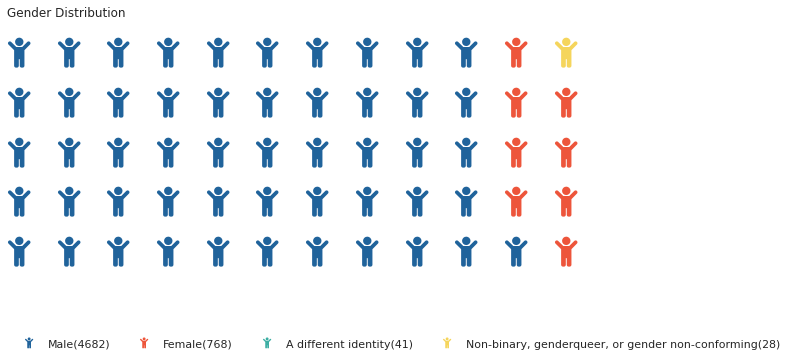

In [ ]:
#Taken from Internet
!pip install pywaffle
from pywaffle import Waffle

gender = train_df['GenderSelect'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=12,
    values=gender,
    colors = ('#20639B', '#ED553B', '#3CAEA3', '#F5D55C'),
    title={'label': 'Gender Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(train_df), 'framealpha': 0},
    font_size=30, 
    icons = 'child',
    figsize=(12, 5),  
    icon_legend=True
)

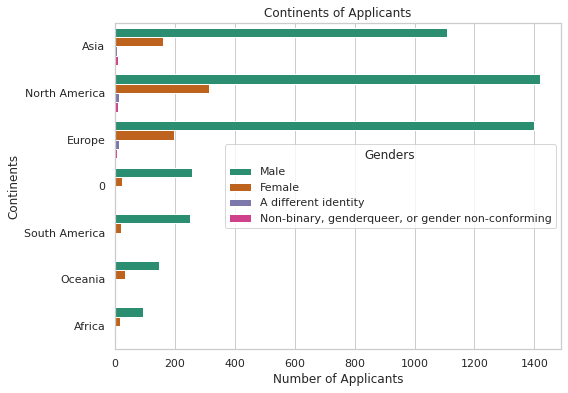

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Continents of Applicants")
sns.countplot(y=train_df['Country'],hue=train_df["GenderSelect"], palette = "Dark2")
plt.ylabel("Continents")
plt.xlabel("Number of Applicants")
plt.legend(title="Genders")
plt.show()

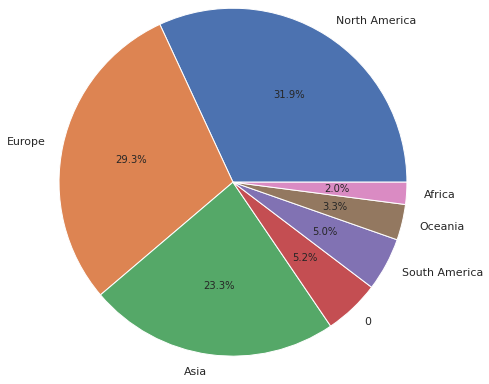

In [ ]:
train_df["Country"].value_counts().plot.pie(autopct="%.1f%%", radius=2)

In [ ]:
train_df["Age"]
pd.options.display.float_format = '{:,.0f}'.format
train_df["Age"]

0      28
1      26
2      34
3      33
4      35
       ..
5524   48
5525   27
5526   30
5527   29
5528   35
Name: Age, Length: 5529, dtype: float64

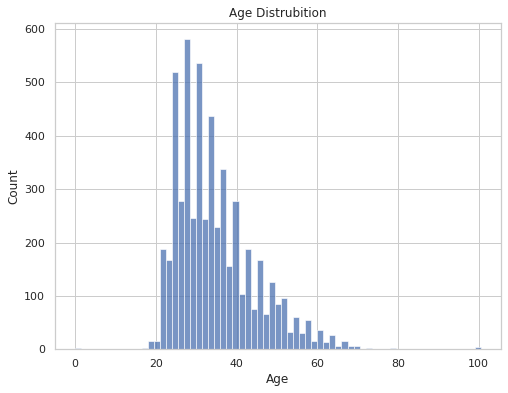

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Age Distrubition")
sns.histplot(x=train_df['Age'], binwidth=1.5, legend="full")
plt.show()

In [ ]:
train_df["FormalEducation"].value_counts()

Master's degree                                                      2523
Bachelor's degree                                                    1368
Doctoral degree                                                      1231
Professional degree                                                   175
Some college/university study without earning a bachelor's degree     170
I did not complete any formal education past high school               37
I prefer not to answer                                                 18
Name: FormalEducation, dtype: int64

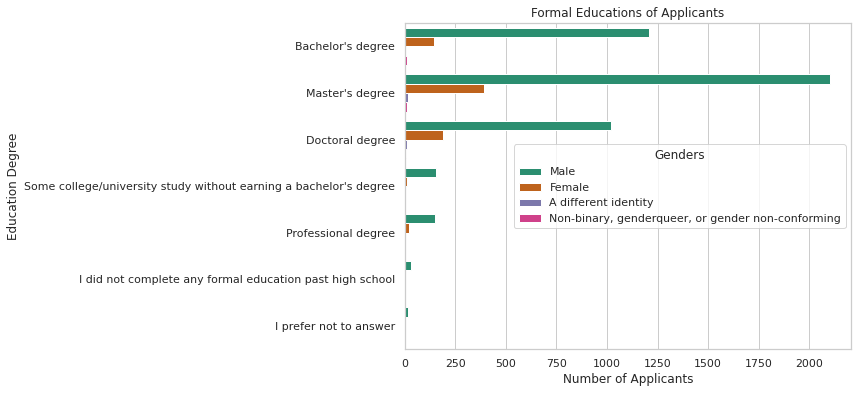

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Formal Educations of Applicants")
sns.countplot(y=train_df['FormalEducation'],hue=train_df["GenderSelect"], palette = "Dark2")
plt.ylabel("Education Degree")
plt.xlabel("Number of Applicants")
plt.legend(title="Genders")
plt.show()

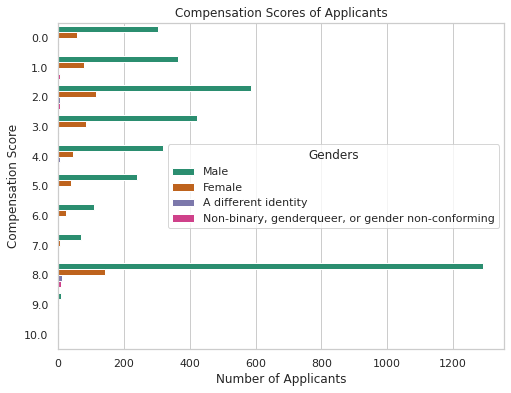

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Compensation Scores of Applicants")
sns.countplot(y=train_df['CompensationScore'],hue=train_df["GenderSelect"], palette = "Dark2")
plt.ylabel("Compensation Score")
plt.xlabel("Number of Applicants")
plt.legend(title="Genders")
plt.show()

In [ ]:
train_df['JobSatisfaction'].value_counts()

8     1216
7     1207
6      661
9      560
5      536
10     512
3      300
4      298
1      138
2      101
Name: JobSatisfaction, dtype: int64

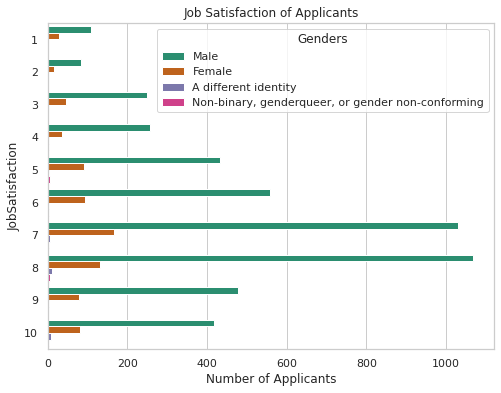

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Job Satisfaction of Applicants")
sns.countplot(y=train_df['JobSatisfaction'],hue=train_df["GenderSelect"], palette = "Dark2")
plt.ylabel("JobSatisfaction")
plt.xlabel("Number of Applicants")
plt.legend(title="Genders")
plt.show()

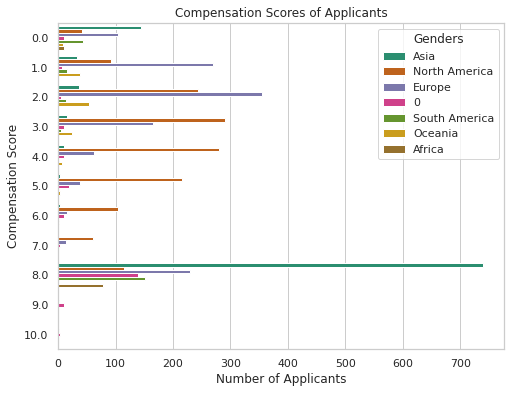

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Compensation Scores of Applicants")
sns.countplot(y=train_df['CompensationScore'],hue=train_df["Country"], palette = "Dark2")
plt.ylabel("Compensation Score")
plt.xlabel("Number of Applicants")
plt.legend(title="Genders")
plt.show()

In [ ]:
train_df["Countries"] = train_df["Countries"].fillna(train_df["Countries"].mode()[0])

In [ ]:
train_df["CompensationScore"] = train_df["CompensationScore"].fillna(train_df["CompensationScore"].mode()[0])

In [ ]:
Country_list = train_df["Countries"].unique().tolist()
d = dict.fromkeys(Country_list,0)

In [ ]:
for i in range(train_df["Countries"].size):
  d[train_df["Countries"][i]] += train_df["CompensationScore"][i]

In [ ]:
for m in d:
  d[m] /= train_df["Countries"].value_counts()[m]


In [ ]:
highest_compensation_scores_list = []
highest_compensation_countries_list = []
for w in sorted(d, key=d.get, reverse=True):
    highest_compensation_scores_list.append(d[w])
    highest_compensation_countries_list.append(w)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


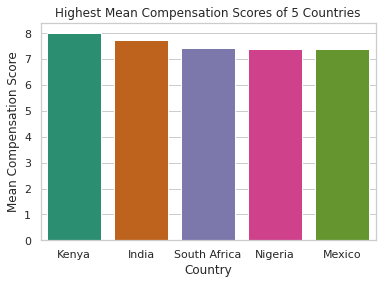

In [ ]:
sns.set(style="whitegrid")
sns.barplot(highest_compensation_countries_list[:5], highest_compensation_scores_list[:5], palette="Dark2")
plt.title("Highest Mean Compensation Scores of 5 Countries")
plt.ylabel("Mean Compensation Score")
plt.xlabel("Country")
plt.show()

In [ ]:
train_df["EmploymentStatus"].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', 'Employed part-time'], dtype=object)

In [ ]:
train_df["EmploymentStatus"].value_counts()

Employed full-time                                      4673
Independent contractor, freelancer, or self-employed     559
Employed part-time                                       297
Name: EmploymentStatus, dtype: int64

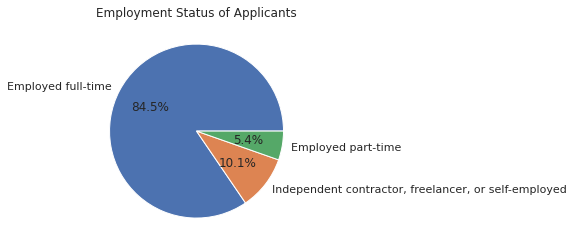

In [ ]:
plt.subplots()
plt.pie(train_df["EmploymentStatus"].value_counts(), autopct="%.1f%%", labels = train_df["EmploymentStatus"].value_counts().index)
plt.title("Employment Status of Applicants")
plt.show()

In [ ]:
train_df["CurrentJobTitleSelect"].unique()

array(['Software Developer/Software Engineer', 'Computer Scientist',
       'Data Analyst', 'Scientist/Researcher', 'Data Scientist',
       'Programmer', 'Machine Learning Engineer', 'Researcher',
       'Business Analyst', 'DBA/Database Engineer', 'Data Miner',
       'Predictive Modeler', 'Engineer', 'Other', 'Statistician',
       'Operations Research Practitioner', nan], dtype=object)

In [ ]:
train_df["CurrentJobTitleSelect"] = train_df["CurrentJobTitleSelect"].fillna(train_df["CurrentJobTitleSelect"].mode()[0])

In [ ]:
train_df["CurrentJobTitleSelect"].value_counts()

Data Scientist                          1544
Data Analyst                             607
Software Developer/Software Engineer     571
Scientist/Researcher                     532
Other                                    461
Machine Learning Engineer                327
Business Analyst                         306
Researcher                               297
Engineer                                 192
Statistician                             150
Computer Scientist                       145
Programmer                               120
Predictive Modeler                       110
DBA/Database Engineer                     87
Data Miner                                52
Operations Research Practitioner          28
Name: CurrentJobTitleSelect, dtype: int64

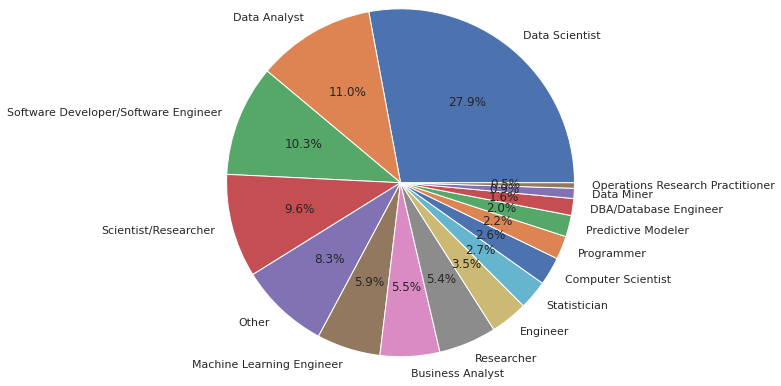

In [ ]:
plt.subplots()
plt.pie(train_df["CurrentJobTitleSelect"].value_counts(), autopct="%.1f%%", labels = train_df["CurrentJobTitleSelect"].value_counts().index, radius = 2)
plt.show()

In [ ]:
train_df["TitleFit"].unique()

array(['Fine', 'Poorly', 'Perfectly', nan], dtype=object)

In [ ]:
train_df["TitleFit"] = train_df["TitleFit"].fillna(train_df["TitleFit"].mode()[0])

In [ ]:
train_df["TitleFit"].value_counts()

Fine         3655
Perfectly    1125
Poorly        749
Name: TitleFit, dtype: int64

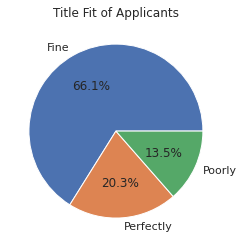

In [ ]:
plt.subplots()
plt.pie(train_df["TitleFit"].value_counts(), autopct="%.1f%%", labels = train_df["TitleFit"].value_counts().index, radius = 1)
plt.title("Title Fit of Applicants")
plt.show()

In [ ]:
#TitleFit ile CurrentJobTitleSelect birlikte bak!

In [ ]:
train_df["MLToolNextYearSelect"].unique()

array(['Python', 'TensorFlow', 'IBM Watson / Waton Analytics',
       'Google Cloud Compute', 'Jupyter notebooks', nan, 'NoSQL',
       'Amazon Machine Learning', 'C/C++', 'Java', 'Other', 'R',
       'Spark / MLlib', 'Microsoft Azure Machine Learning', 'DataRobot',
       'Hadoop/Hive/Pig', 'Julia', 'Tableau', 'SAS Base', 'Stan',
       'Amazon Web services',
       "I don't plan on learning a new tool/technology", 'MATLAB/Octave',
       'Perl', 'Oracle Data Mining/ Oracle R Enterprise',
       'Microsoft Excel Data Mining',
       'SAP BusinessObjects Predictive Analytics', 'SQL', 'Mathematica',
       'KNIME (free version)', 'Flume', 'RapidMiner (free version)',
       'Orange', 'IBM SPSS Statistics',
       'Microsoft R Server (Formerly Revolution Analytics)',
       'SAS Enterprise Miner', 'Impala', 'KNIME (commercial version)',
       'Cloudera', 'Unix shell / awk',
       'Statistica (Quest/Dell-formerly Statsoft)', 'Weka', 'IBM Cognos',
       'RapidMiner (commercial version)'

In [ ]:
train_df["MLToolNextYearSelect"].value_counts()[:5]

TensorFlow       1337
Python            677
Spark / MLlib     457
R                 354
Other             252
Name: MLToolNextYearSelect, dtype: int64

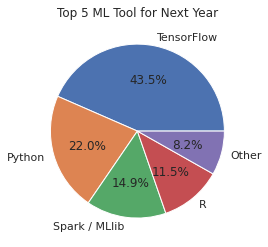

In [ ]:
plt.subplots()
plt.pie(train_df["MLToolNextYearSelect"].value_counts()[:5], autopct="%.1f%%", labels = train_df["MLToolNextYearSelect"].value_counts()[:5].index, radius = 1)
plt.title("Top 5 ML Tool for Next Year")
plt.show()

In [ ]:
train_df["MLMethodNextYearSelect"].unique()

array(['Link Analysis', 'Deep learning', 'Cluster Analysis',
       'Neural Nets', 'Text Mining', nan,
       'Ensemble Methods (e.g. boosting, bagging)',
       'Social Network Analysis', 'Time Series Analysis',
       'Bayesian Methods', 'Genetic & Evolutionary Algorithms',
       'Rule Induction', 'Anomaly Detection', 'Decision Trees',
       'Random Forests', "I don't plan on learning a new ML/DS method",
       'Monte Carlo Methods', 'Proprietary Algorithms', 'Other',
       'Survival Analysis', 'MARS', 'Regression',
       'Support Vector Machines (SVM)', 'Association Rules',
       'Uplift Modeling', 'Factor Analysis'], dtype=object)

In [ ]:
train_df["MLMethodNextYearSelect"].value_counts()[:5]

Deep learning           2096
Neural Nets              669
Time Series Analysis     318
Bayesian Methods         291
Text Mining              217
Name: MLMethodNextYearSelect, dtype: int64

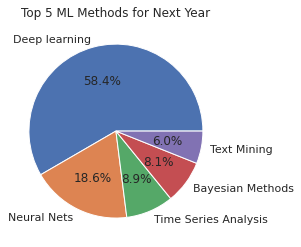

In [ ]:
plt.subplots()
plt.pie(train_df["MLMethodNextYearSelect"].value_counts()[:5], autopct="%.1f%%", labels = train_df["MLMethodNextYearSelect"].value_counts()[:5].index, radius = 1)
plt.title("Top 5 ML Methods for Next Year")
plt.show()

In [ ]:
train_df["LanguageRecommendationSelect"].unique()

array(['SAS', 'Python', 'R', 'Other', nan, 'SQL', 'C/C++/C#', 'Java',
       'Matlab', 'Scala', 'Stata', 'Julia', 'Haskell', 'F#'], dtype=object)

In [ ]:
train_df["LanguageRecommendationSelect"].value_counts()[:5]

Python      3322
R           1365
SQL          220
C/C++/C#     109
Matlab        94
Name: LanguageRecommendationSelect, dtype: int64

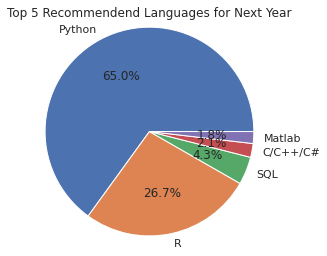

In [ ]:
plt.subplots()
plt.pie(train_df["LanguageRecommendationSelect"].value_counts()[:5], autopct="%.1f%%", labels = train_df["LanguageRecommendationSelect"].value_counts()[:5].index, radius = 1.2)
plt.title("Top 5 Recommendend Languages for Next Year")
plt.show()

In [ ]:
train_df["DataScienceIdentitySelect"].unique()
train_df["DataScienceIdentitySelect"].value_counts()

Yes                       1687
No                        1210
Sort of (Explain more)    1087
Name: DataScienceIdentitySelect, dtype: int64

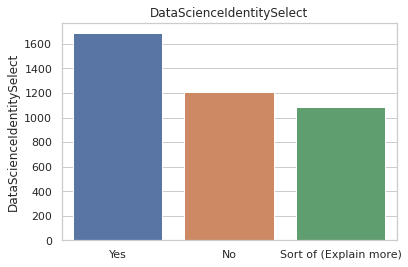

In [ ]:
plt.subplots()
sns.barplot(y = train_df["DataScienceIdentitySelect"].value_counts(), x = train_df["DataScienceIdentitySelect"].value_counts().index)
plt.title("DataScienceIdentitySelect")
plt.show()

In [ ]:
train_df['CurrentJobTitleSelect'].value_counts()

Data Scientist                          1544
Data Analyst                             607
Software Developer/Software Engineer     571
Scientist/Researcher                     532
Other                                    461
Machine Learning Engineer                327
Business Analyst                         306
Researcher                               297
Engineer                                 192
Statistician                             150
Computer Scientist                       145
Programmer                               120
Predictive Modeler                       110
DBA/Database Engineer                     87
Data Miner                                52
Operations Research Practitioner          28
Name: CurrentJobTitleSelect, dtype: int64

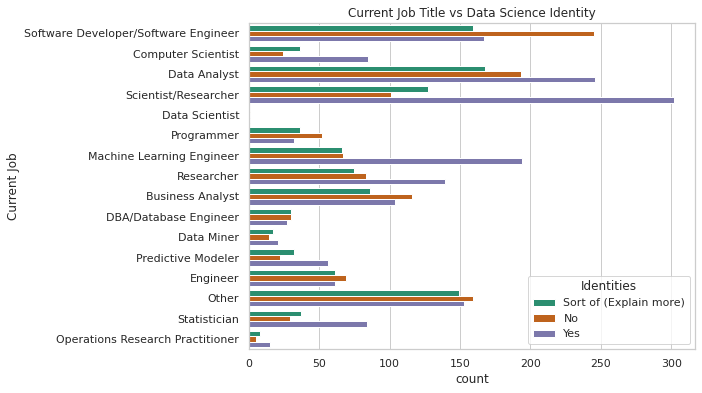

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Current Job Title vs Data Science Identity")
sns.countplot(y = train_df['CurrentJobTitleSelect'], hue = train_df['DataScienceIdentitySelect'], palette = "Dark2")
plt.ylabel("Current Job")
plt.legend(title="Identities")
plt.show()

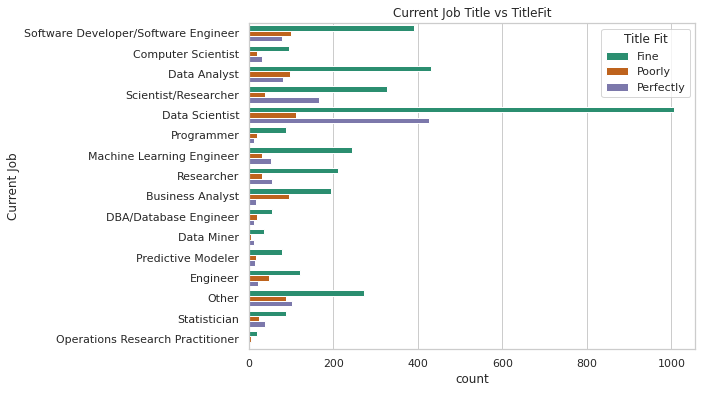

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Current Job Title vs TitleFit")
sns.countplot(y = train_df['CurrentJobTitleSelect'], hue = train_df['TitleFit'], palette = "Dark2")
plt.ylabel("Current Job")
plt.legend(title="Title Fit")
plt.show()

In [ ]:
train_df["EmployerIndustry"].unique()

array(['Technology', 'Government', 'Academic', 'Internet-based',
       'Mix of fields', 'Telecommunications', 'Insurance',
       'Military/Security', 'CRM/Marketing', 'Financial', 'Other',
       'Retail', 'Manufacturing', 'Pharmaceutical',
       'Hospitality/Entertainment/Sports', 'Non-profit', nan],
      dtype=object)

In [ ]:
data = train_df.loc[train_df['CurrentJobTitleSelect'] == "Data Scientist"]

In [ ]:
data['CurrentJobTitleSelect']

5       Data Scientist
8       Data Scientist
12      Data Scientist
18      Data Scientist
21      Data Scientist
             ...      
5510    Data Scientist
5519    Data Scientist
5522    Data Scientist
5524    Data Scientist
5525    Data Scientist
Name: CurrentJobTitleSelect, Length: 1544, dtype: object

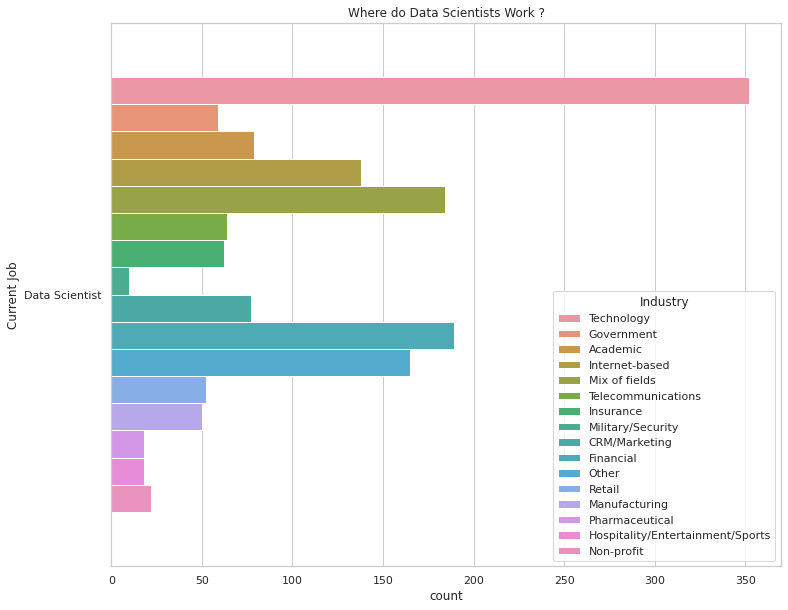

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("Where do Data Scientists Work ?")
sns.countplot(y = data["CurrentJobTitleSelect"], hue = train_df['EmployerIndustry'])
plt.ylabel("Current Job")
plt.legend(title="Industry")
plt.show()

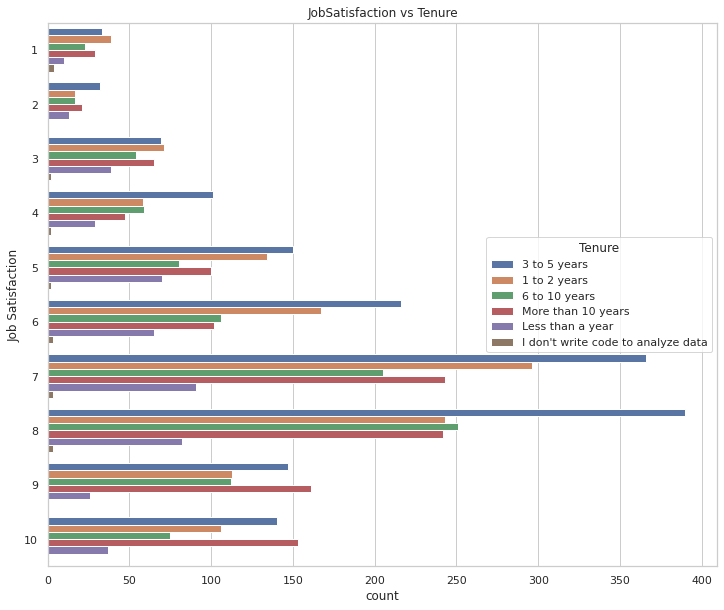

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs Tenure")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['Tenure'])
plt.ylabel("Job Satisfaction")
plt.legend(title="Tenure")
plt.show()

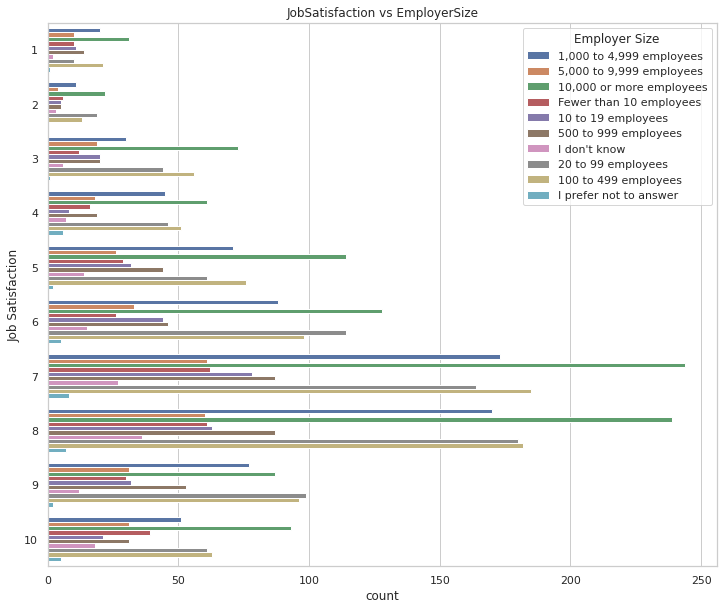

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs EmployerSize")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['EmployerSize'])
plt.ylabel("Job Satisfaction")
plt.legend(title="Employer Size")
plt.show()

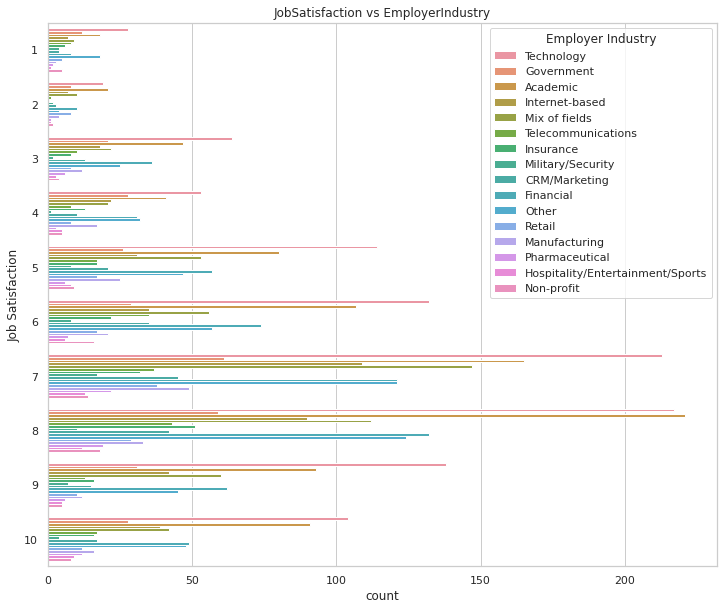

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs EmployerIndustry")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['EmployerIndustry'])
plt.ylabel("Job Satisfaction")
plt.legend(title="Employer Industry")
plt.show()

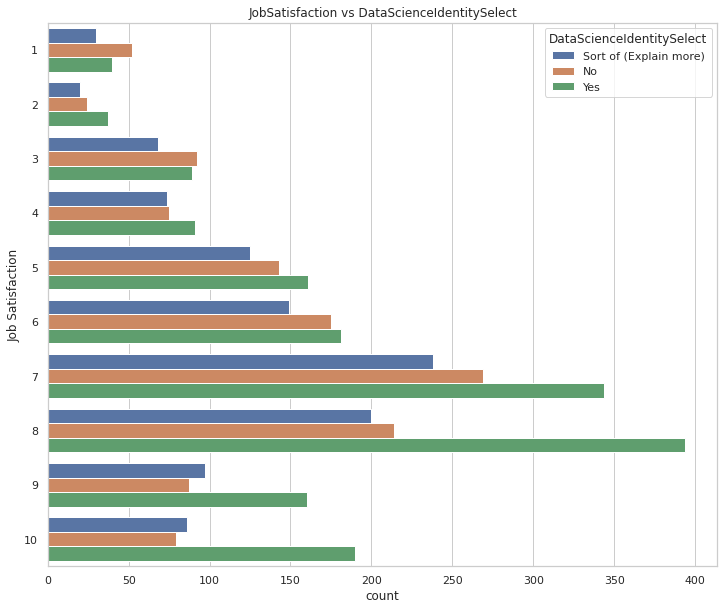

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs DataScienceIdentitySelect")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['DataScienceIdentitySelect'])
plt.ylabel("Job Satisfaction")
plt.legend(title="DataScienceIdentitySelect")
plt.show()

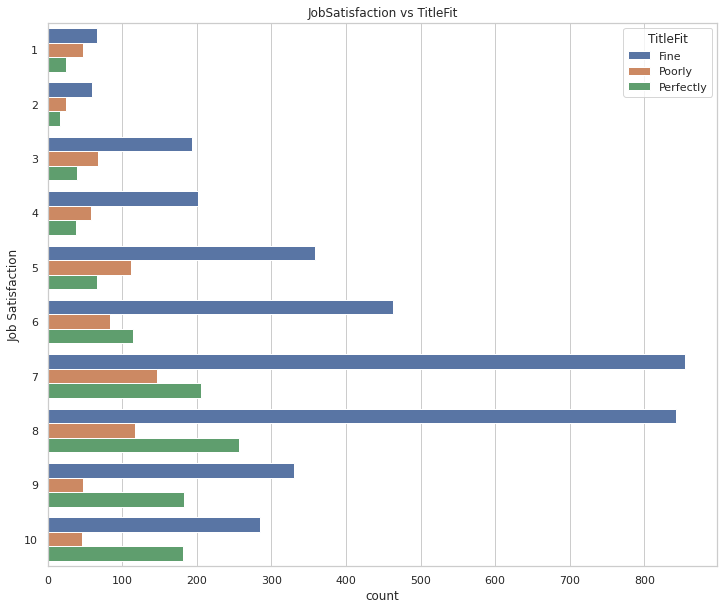

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs TitleFit")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['TitleFit'])
plt.ylabel("Job Satisfaction")
plt.legend(title="TitleFit")
plt.show()

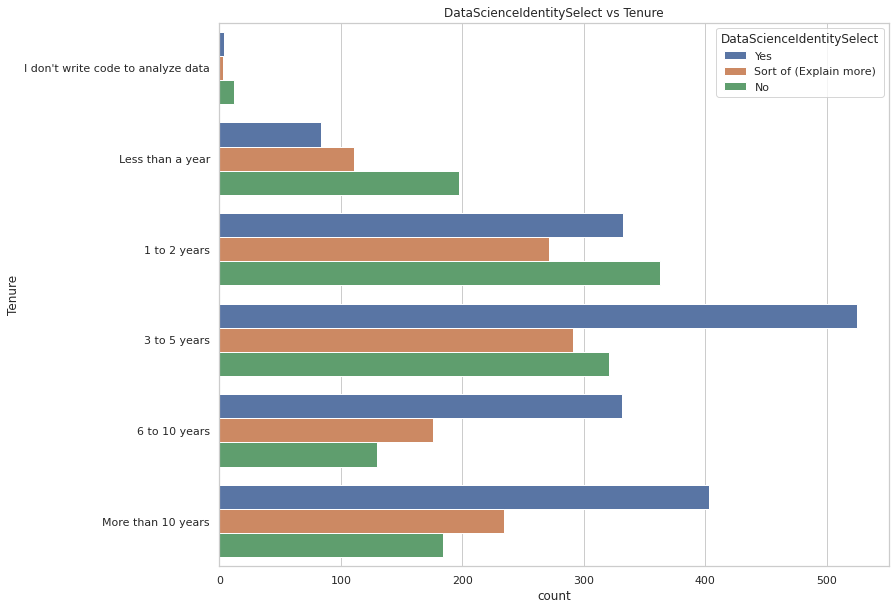

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("DataScienceIdentitySelect vs Tenure")
sns.countplot(y = train_df["Tenure"],order=["I don't write code to analyze data",'Less than a year','1 to 2 years','3 to 5 years','6 to 10 years','More than 10 years'], hue = train_df['DataScienceIdentitySelect'], hue_order=["Yes", "Sort of (Explain more)", "No"])
plt.ylabel("Tenure")
plt.legend(title="DataScienceIdentitySelect")
plt.show()

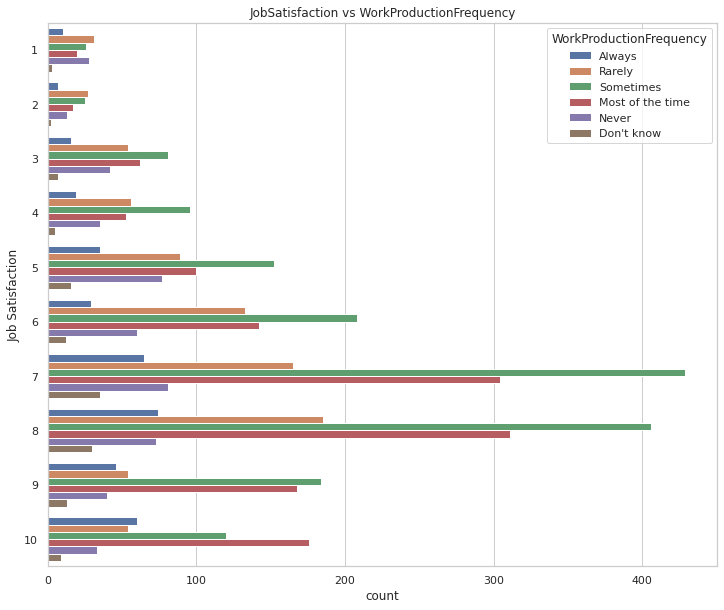

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs WorkProductionFrequency")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['WorkProductionFrequency'])
plt.ylabel("Job Satisfaction")
plt.legend(title="WorkProductionFrequency")
plt.show()

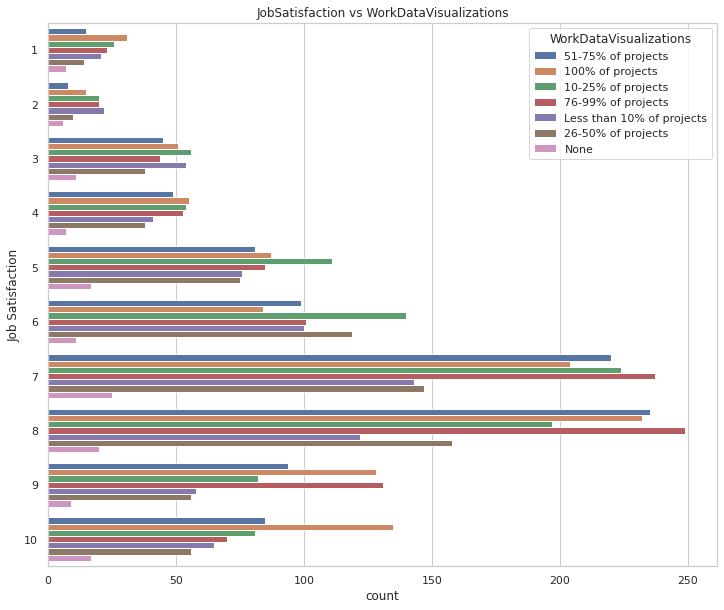

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs WorkDataVisualizations")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['WorkDataVisualizations'])
plt.ylabel("Job Satisfaction")
plt.legend(title="WorkDataVisualizations")
plt.show()

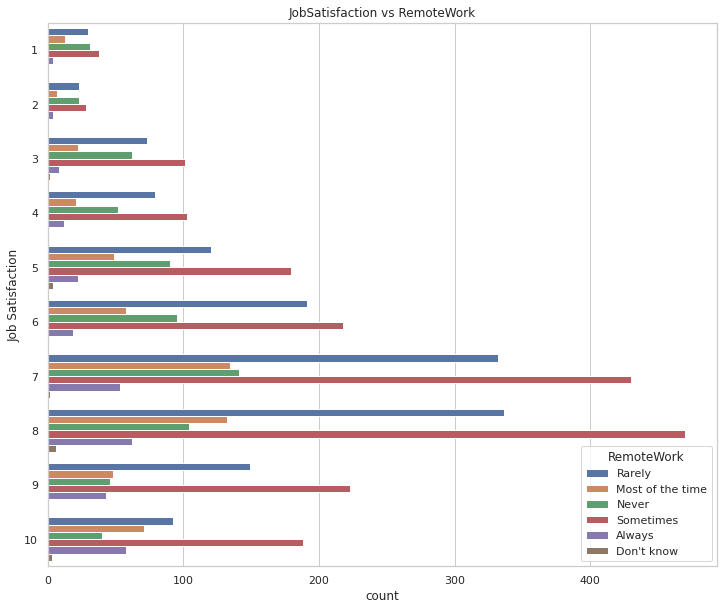

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs RemoteWork")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['RemoteWork'])
plt.ylabel("Job Satisfaction")
plt.legend(title="RemoteWork")
plt.show()

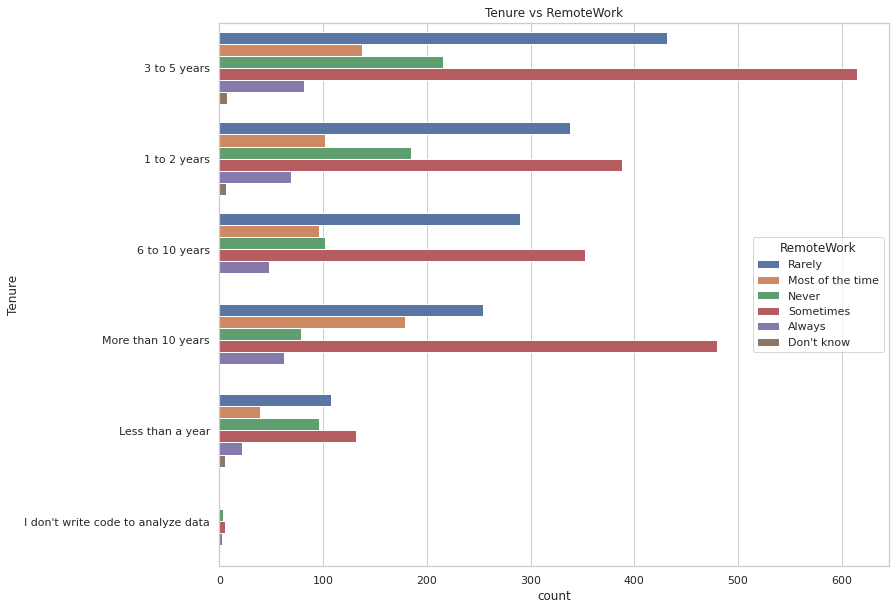

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("Tenure vs RemoteWork")
sns.countplot(y = train_df["Tenure"], hue = train_df['RemoteWork'])
plt.legend(title="RemoteWork")
plt.show()

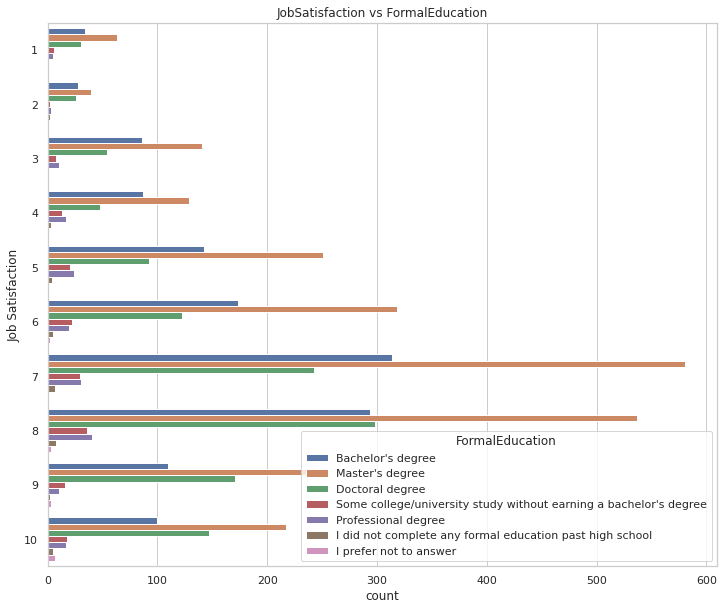

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("JobSatisfaction vs FormalEducation")
sns.countplot(y = train_df["JobSatisfaction"], hue = train_df['FormalEducation'])
plt.ylabel("Job Satisfaction")
plt.legend(title="FormalEducation")
plt.show()

In [ ]:
train_df['MLToolNextYearSelect'].unique()

array(['Python', 'TensorFlow', 'IBM Watson / Waton Analytics',
       'Google Cloud Compute', 'Jupyter notebooks', nan, 'NoSQL',
       'Amazon Machine Learning', 'C/C++', 'Java', 'Other', 'R',
       'Spark / MLlib', 'Microsoft Azure Machine Learning', 'DataRobot',
       'Hadoop/Hive/Pig', 'Julia', 'Tableau', 'SAS Base', 'Stan',
       'Amazon Web services',
       "I don't plan on learning a new tool/technology", 'MATLAB/Octave',
       'Perl', 'Oracle Data Mining/ Oracle R Enterprise',
       'Microsoft Excel Data Mining',
       'SAP BusinessObjects Predictive Analytics', 'SQL', 'Mathematica',
       'KNIME (free version)', 'Flume', 'RapidMiner (free version)',
       'Orange', 'IBM SPSS Statistics',
       'Microsoft R Server (Formerly Revolution Analytics)',
       'SAS Enterprise Miner', 'Impala', 'KNIME (commercial version)',
       'Cloudera', 'Unix shell / awk',
       'Statistica (Quest/Dell-formerly Statsoft)', 'Weka', 'IBM Cognos',
       'RapidMiner (commercial version)'

In [ ]:
python = train_df.loc[train_df['MLToolNextYearSelect'] == "Python"]
TensorFlow = train_df.loc[train_df['MLToolNextYearSelect'] == "TensorFlow"]
Spark = train_df.loc[train_df['MLToolNextYearSelect'] == "Spark / MLlib"]
Angoss = train_df.loc[train_df['MLToolNextYearSelect'] == "Angoss"]

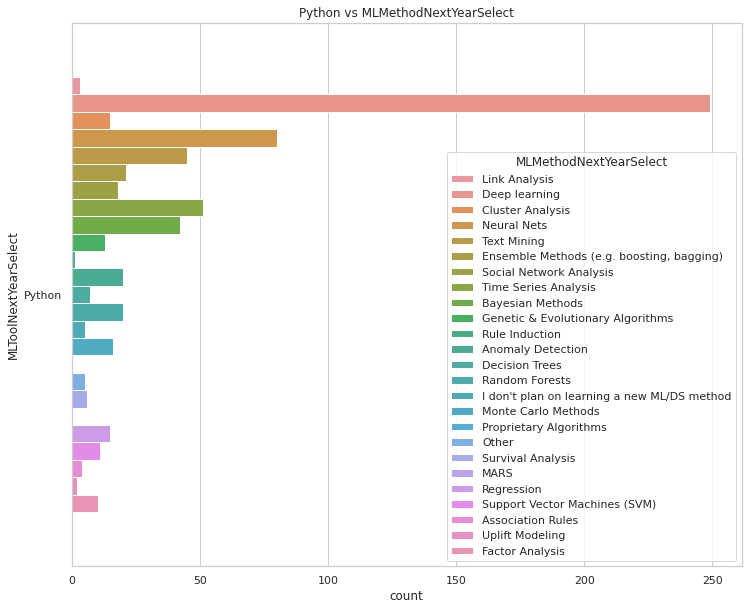

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("Python vs MLMethodNextYearSelect")
sns.countplot(y = python["MLToolNextYearSelect"], hue = train_df['MLMethodNextYearSelect'])
plt.legend(title="MLMethodNextYearSelect")
plt.show()

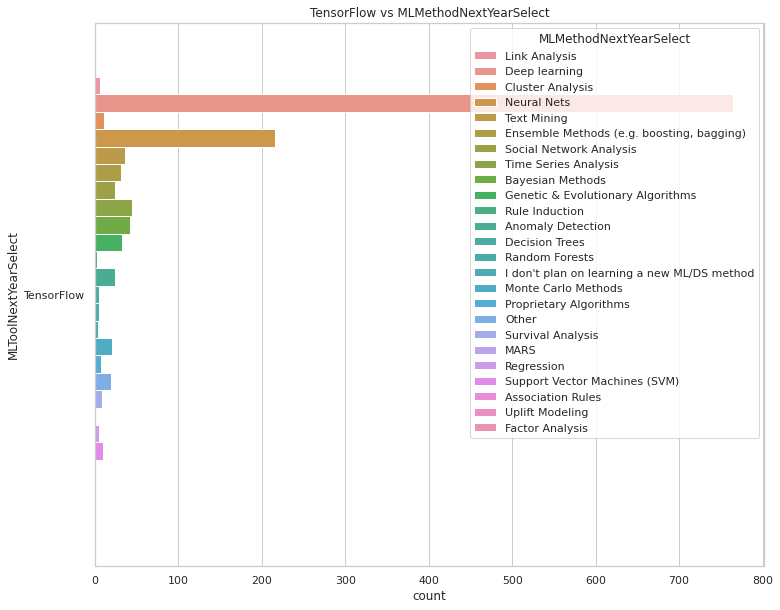

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("TensorFlow vs MLMethodNextYearSelect")
sns.countplot(y = TensorFlow["MLToolNextYearSelect"], hue = train_df['MLMethodNextYearSelect'])
plt.legend(title="MLMethodNextYearSelect")
plt.show()

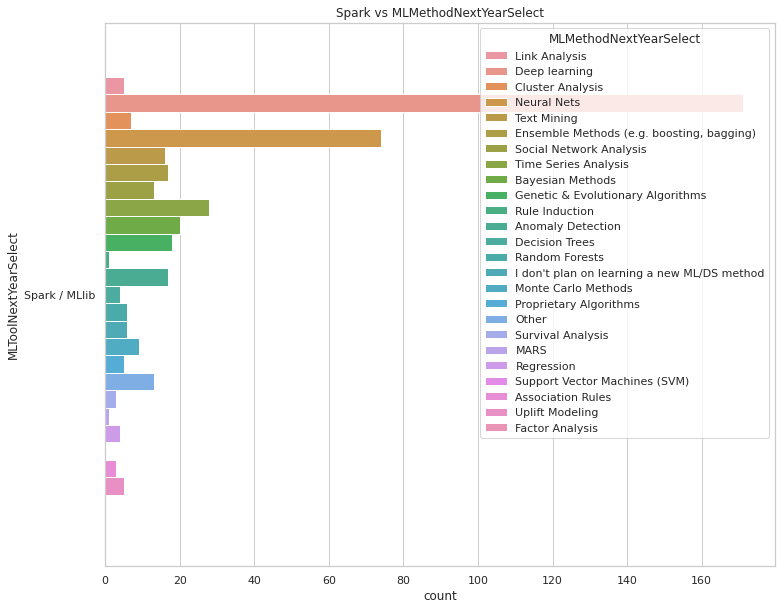

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("Spark vs MLMethodNextYearSelect")
sns.countplot(y = Spark["MLToolNextYearSelect"], hue = train_df['MLMethodNextYearSelect'])
plt.legend(title="MLMethodNextYearSelect")
plt.show()

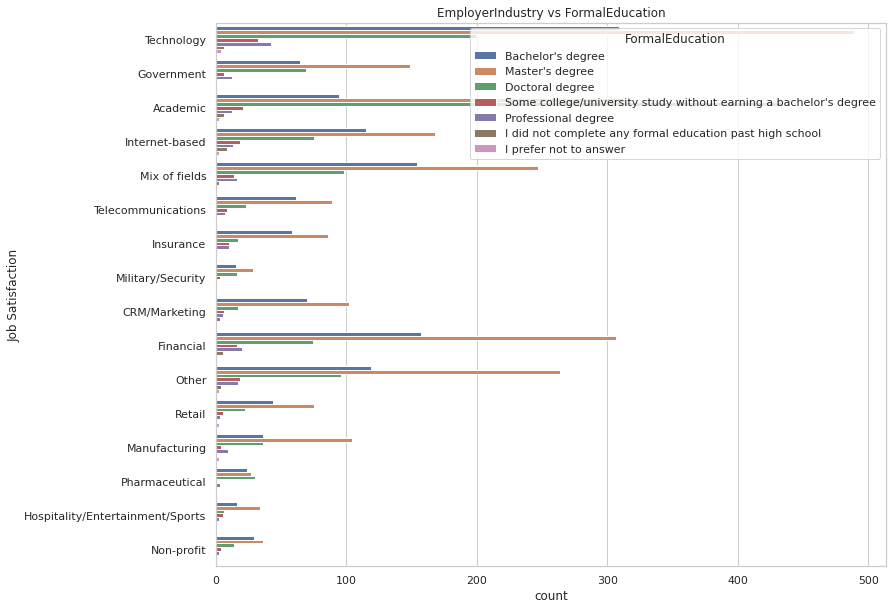

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("EmployerIndustry vs FormalEducation")
sns.countplot(y = train_df["EmployerIndustry"], hue = train_df['FormalEducation'])
plt.ylabel("Job Satisfaction")
plt.legend(title="FormalEducation")
plt.show()

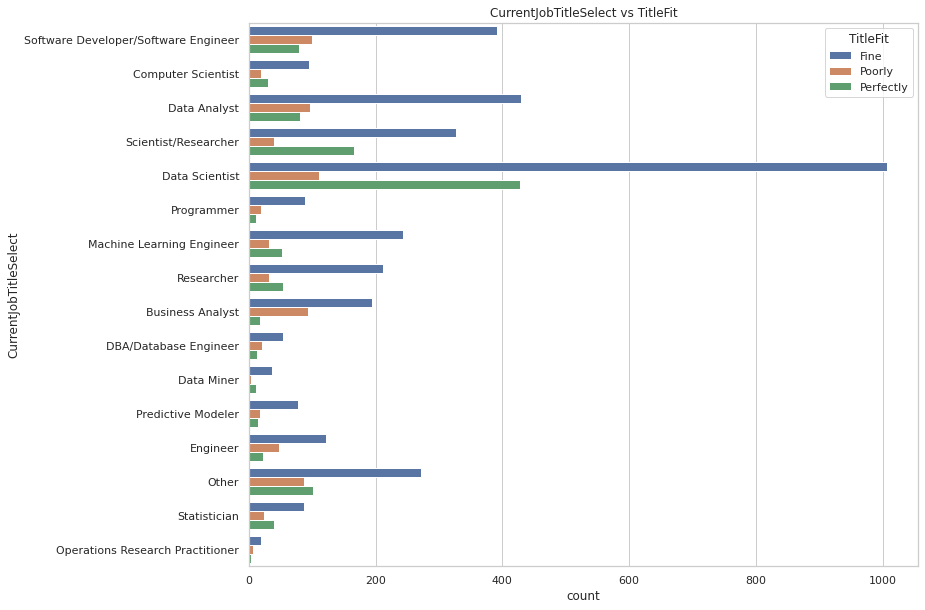

In [ ]:
plt.subplots(figsize=(12,10))
plt.title("CurrentJobTitleSelect vs TitleFit")
sns.countplot(y = train_df["CurrentJobTitleSelect"], hue = train_df['TitleFit'])
plt.legend(title="TitleFit")
plt.show()

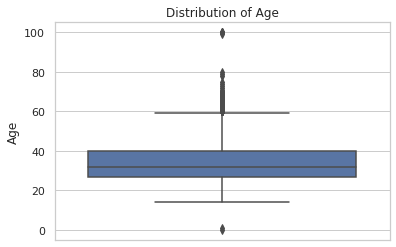

In [ ]:
sns.boxplot(y=train_df['Age'])
plt.title("Distribution of Age")
plt.show()

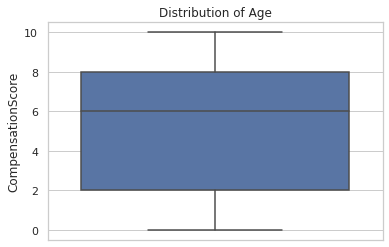

In [ ]:
sns.boxplot(y=train_df['CompensationScore'])
plt.title("Distribution of Age")
plt.show()

Text(0, 0.5, 'JobSatisfaction')

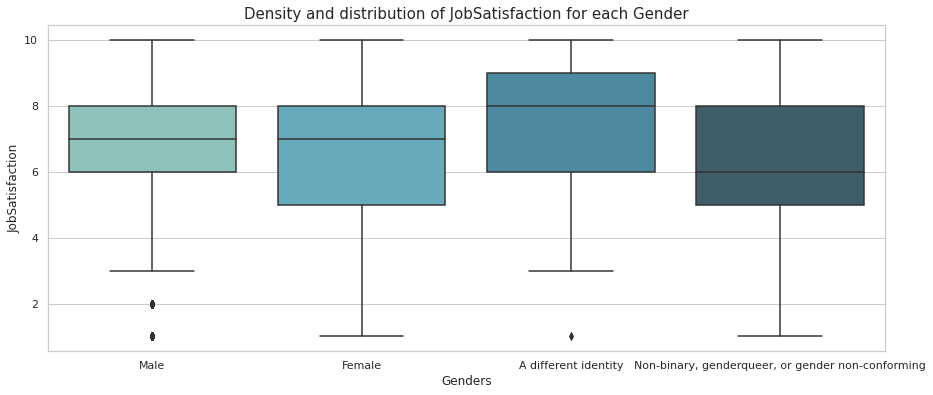

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=train_df, x=train_df["GenderSelect"], y=train_df["JobSatisfaction"] , palette='GnBu_d')
plt.title('Density and distribution of JobSatisfaction for each Gender', fontsize=15)
plt.xlabel('Genders')
plt.ylabel("JobSatisfaction")

In [ ]:
temp_df = train1_df
bins= [1,30,55, 101]
labels = ['Young','Adult', "Old"]
temp_df['Age'] = pd.cut(temp_df['Age'], bins=bins, labels=labels, right=False)


In [ ]:
temp2_df = train_df
bins= [1,33, 101]
labels = ['Young','Adult']
temp2_df['Age'] = pd.cut(temp2_df['Age'], bins=bins, labels=labels, right=False)


Text(0, 0.5, 'Age Group')

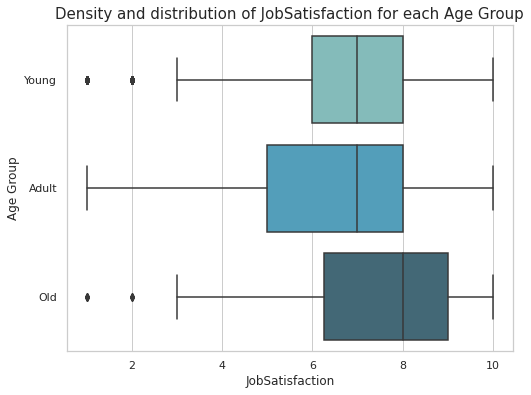

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, y=temp_df["Age"], x=temp_df["JobSatisfaction"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for each Age Group', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("Age Group")

Text(0, 0.5, 'Continents')

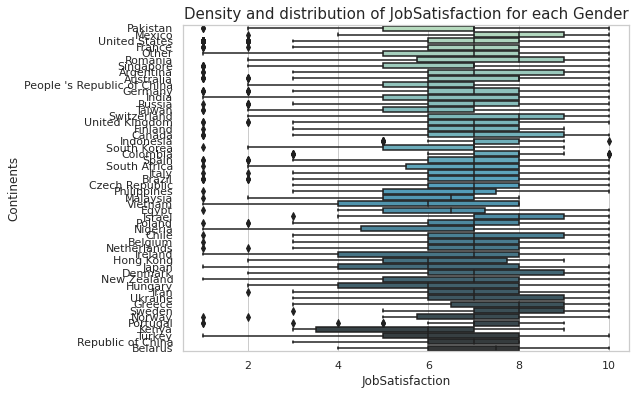

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, x=temp_df["JobSatisfaction"], y=temp_df["Country"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for each Gender', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("Continents")

Text(0, 0.5, 'Tenure')

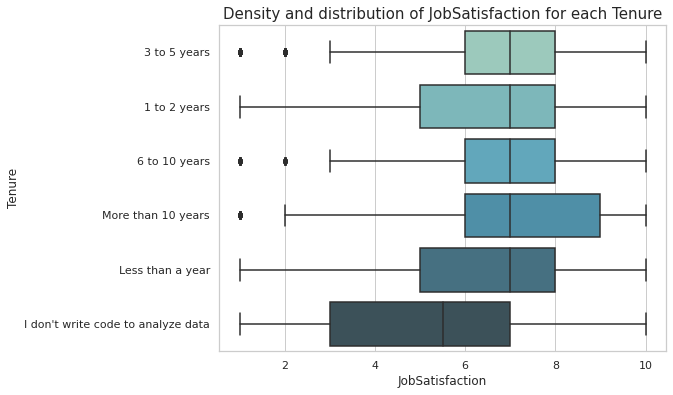

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, x=temp_df["JobSatisfaction"], y=temp_df["Tenure"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for each Tenure', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

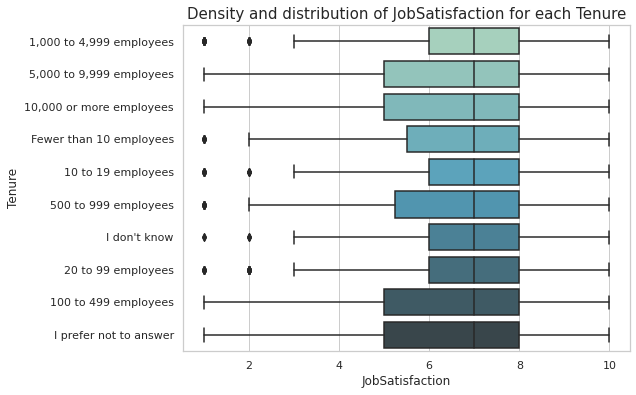

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, x=temp_df["JobSatisfaction"], y=temp_df["EmployerSize"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for each Tenure', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

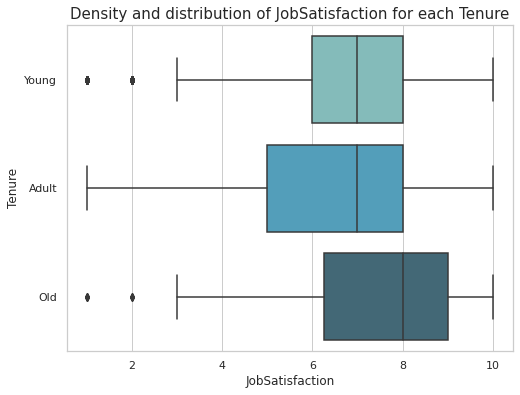

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, x=temp_df["JobSatisfaction"], y=temp_df["Age"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for each Tenure', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("Tenure")

Text(0, 0.5, 'FormalEducation')

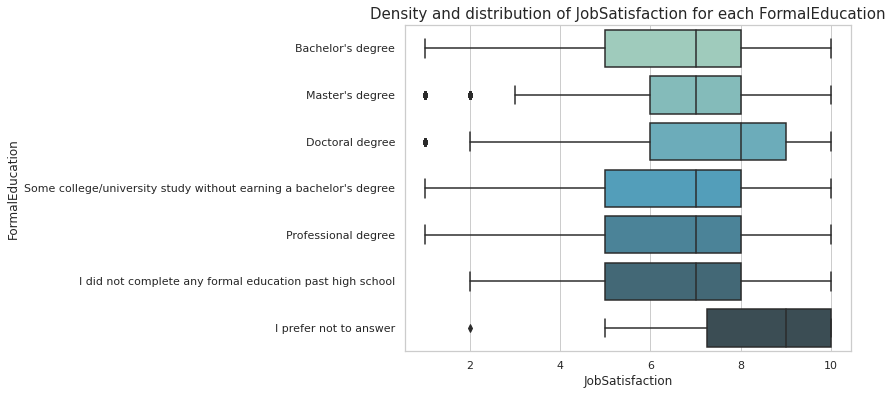

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, x=temp_df["JobSatisfaction"], y=temp_df["FormalEducation"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for each FormalEducation', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("FormalEducation")

Text(0, 0.5, 'Title Fit')

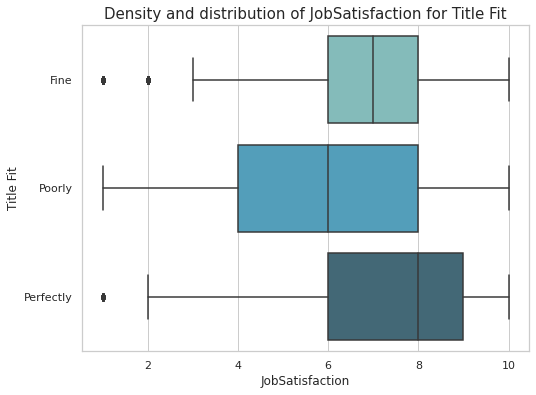

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, x=temp_df["JobSatisfaction"], y=temp_df["TitleFit"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for Title Fit', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("Title Fit")

Text(0, 0.5, 'RemoteWork')

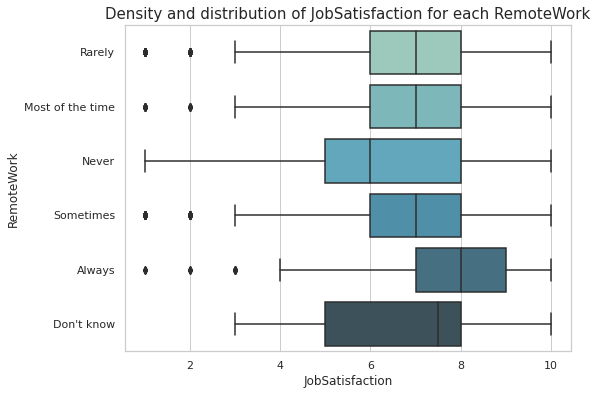

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df, x=temp_df["JobSatisfaction"], y=temp_df["RemoteWork"] , palette='GnBu_d', orient="h")
plt.title('Density and distribution of JobSatisfaction for each RemoteWork', fontsize=15)
plt.xlabel('JobSatisfaction')
plt.ylabel("RemoteWork")

In [ ]:
print(train_df["LearningPlatformUsefulnessBlogs"].value_counts())
Blog = train_df["LearningPlatformUsefulnessBlogs"].value_counts()[0] / (train_df["LearningPlatformUsefulnessBlogs"].value_counts()[0]+ train_df["LearningPlatformUsefulnessBlogs"].value_counts()[1]+ train_df["LearningPlatformUsefulnessBlogs"].value_counts()[2])
Blog

Very useful        1259
Somewhat useful    1251
Not Useful           21
Name: LearningPlatformUsefulnessBlogs, dtype: int64


0.49743184512050576

In [ ]:
print(train_df["LearningPlatformUsefulnessKaggle"].value_counts())
Kaggle = train_df["LearningPlatformUsefulnessKaggle"].value_counts()[0] / (train_df["LearningPlatformUsefulnessKaggle"].value_counts()[0]+ train_df["LearningPlatformUsefulnessKaggle"].value_counts()[1] + train_df["LearningPlatformUsefulnessKaggle"].value_counts()[2])
Kaggle

Very useful        1822
Somewhat useful    1320
Not Useful           26
Name: LearningPlatformUsefulnessKaggle, dtype: int64


0.5751262626262627

In [ ]:
print(train_df["LearningPlatformUsefulnessCourses"].value_counts())
Courses = train_df["LearningPlatformUsefulnessCourses"].value_counts()[0] / (train_df["LearningPlatformUsefulnessCourses"].value_counts()[0] + train_df["LearningPlatformUsefulnessCourses"].value_counts()[1] + train_df["LearningPlatformUsefulnessCourses"].value_counts()[2])
Courses

Very useful        1990
Somewhat useful     923
Not Useful           28
Name: LearningPlatformUsefulnessCourses, dtype: int64


0.6766405984359062

In [ ]:
print(train_df["LearningPlatformUsefulnessProjects"].value_counts())
Projects = train_df["LearningPlatformUsefulnessProjects"].value_counts()[0] / (train_df["LearningPlatformUsefulnessProjects"].value_counts()[0] + train_df["LearningPlatformUsefulnessProjects"].value_counts()[1] + train_df["LearningPlatformUsefulnessProjects"].value_counts()[2])
Projects

Very useful        1862
Somewhat useful     619
Not Useful           18
Name: LearningPlatformUsefulnessProjects, dtype: int64


0.7450980392156863

In [ ]:
print(train_df["LearningPlatformUsefulnessSO"].value_counts())
SO = train_df["LearningPlatformUsefulnessSO"].value_counts()[0] / (train_df["LearningPlatformUsefulnessSO"].value_counts()[0]+ train_df["LearningPlatformUsefulnessSO"].value_counts()[1]+ train_df["LearningPlatformUsefulnessSO"].value_counts()[2])
SO

Very useful        1950
Somewhat useful    1017
Not Useful           29
Name: LearningPlatformUsefulnessSO, dtype: int64


0.6508678237650201

In [ ]:
print(train_df["LearningPlatformUsefulnessTextbook"].value_counts())
Textbook = train_df["LearningPlatformUsefulnessTextbook"].value_counts()[0] / (train_df["LearningPlatformUsefulnessTextbook"].value_counts()[0] + train_df["LearningPlatformUsefulnessTextbook"].value_counts()[1] + train_df["LearningPlatformUsefulnessTextbook"].value_counts()[2])
Textbook

Very useful        1244
Somewhat useful     926
Not Useful           32
Name: LearningPlatformUsefulnessTextbook, dtype: int64


0.5649409627611263

In [ ]:
print(train_df["LearningPlatformUsefulnessYouTube"].value_counts())
Youtube = train_df["LearningPlatformUsefulnessYouTube"].value_counts()[1] / (train_df["LearningPlatformUsefulnessYouTube"].value_counts()[1] + train_df["LearningPlatformUsefulnessYouTube"].value_counts()[0] + train_df["LearningPlatformUsefulnessYouTube"].value_counts()[2])
Youtube

Somewhat useful    1222
Very useful        1139
Not Useful           52
Name: LearningPlatformUsefulnessYouTube, dtype: int64


0.4720265230004144

Text(0, 0.5, 'Percentage (%)')

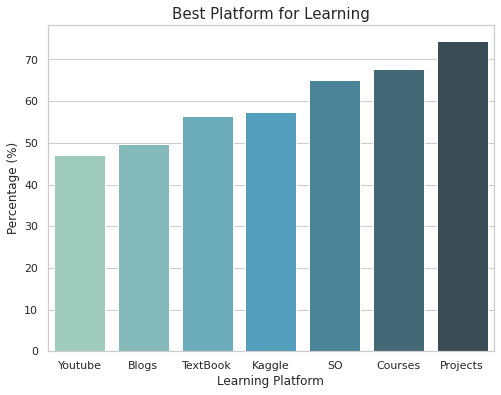

In [ ]:
xax = ["Youtube", "Blogs", "TextBook", "Kaggle", "SO", "Courses", "Projects"]
yax = [Youtube*100, Blog*100, Textbook*100, Kaggle*100, SO*100, Courses*100, Projects*100]
plt.figure(figsize=(8,6))
sns.barplot(x=xax, y= yax , palette='GnBu_d')
plt.title('Best Platform for Learning', fontsize=15)
plt.xlabel('Learning Platform')
plt.ylabel("Percentage (%)")

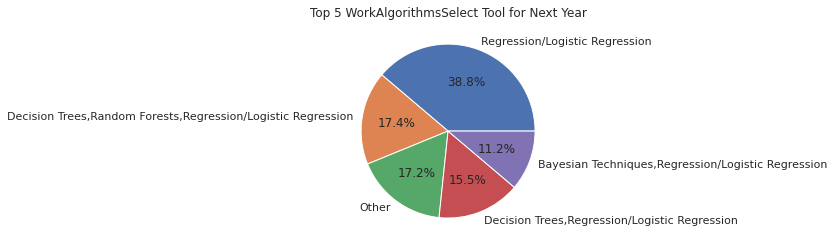

In [ ]:
plt.subplots()
plt.pie(train_df["WorkAlgorithmsSelect"].value_counts()[:5], autopct="%.1f%%", labels = train_df["WorkAlgorithmsSelect"].value_counts()[:5].index, radius = 1)
plt.title("Top 5 WorkAlgorithmsSelect Tool for Next Year")
plt.show()

In [ ]:
print(train_df["WorkToolsFrequencyPython"].value_counts())
print(train_df["WorkToolsFrequencyPython"].count())
PythonFrequency = train_df["WorkToolsFrequencyPython"].value_counts()[0] / (train_df["WorkToolsFrequencyPython"].value_counts()[0]+ train_df["WorkToolsFrequencyPython"].value_counts()[1]+ train_df["WorkToolsFrequencyPython"].value_counts()[2] + train_df["WorkToolsFrequencyPython"].value_counts()[3])
PythonFrequency

Most of the time    2381
Often                882
Sometimes            744
Rarely               240
Name: WorkToolsFrequencyPython, dtype: int64
4247


0.5606310336708265

In [ ]:
print(train_df["WorkToolsFrequencyR"].value_counts())
print(train_df["WorkToolsFrequencyR"].count())
RFrequency = train_df["WorkToolsFrequencyR"].value_counts()[0] / (train_df["WorkToolsFrequencyR"].value_counts()[0]+ train_df["WorkToolsFrequencyR"].value_counts()[1]+ train_df["WorkToolsFrequencyR"].value_counts()[2] + train_df["WorkToolsFrequencyR"].value_counts()[3])
RFrequency

Most of the time    1444
Sometimes            824
Often                766
Rarely               323
Name: WorkToolsFrequencyR, dtype: int64
3357


0.430145963658028

In [ ]:
print(train_df["WorkToolsFrequencySQL"].value_counts())
print(train_df["WorkToolsFrequencySQL"].count())
SQLFrequency = train_df["WorkToolsFrequencySQL"].value_counts()[0] / (train_df["WorkToolsFrequencySQL"].value_counts()[0]+ train_df["WorkToolsFrequencySQL"].value_counts()[1]+ train_df["WorkToolsFrequencySQL"].value_counts()[2] + train_df["WorkToolsFrequencySQL"].value_counts()[3])
SQLFrequency

Most of the time    1500
Often                840
Sometimes            533
Rarely               127
Name: WorkToolsFrequencySQL, dtype: int64
3000


0.5

In [ ]:
train_df["WorkMethodsFrequencyCross-Validation"].count()

2802

Text(0, 0.5, 'Percentage (%)')

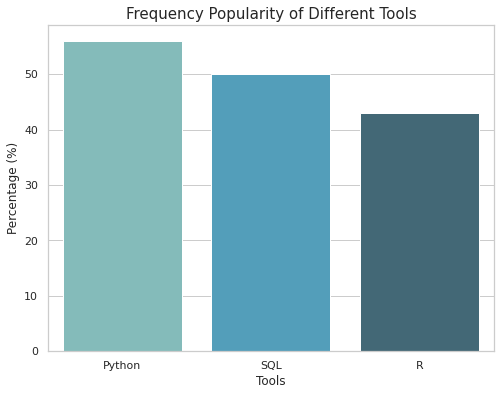

In [ ]:
xax = ["Python",  "SQL", "R",]
yax = [PythonFrequency*100,  SQLFrequency*100, RFrequency*100]
plt.figure(figsize=(8,6))
sns.barplot(x=xax, y= yax , palette='GnBu_d')
plt.title('Frequency Popularity of Different Tools', fontsize=15)
plt.xlabel('Tools')
plt.ylabel("Percentage (%)")

In [ ]:
train_df['Tenure'].unique()

array(['3 to 5 years', '1 to 2 years', '6 to 10 years',
       'More than 10 years', 'Less than a year', nan,
       "I don't write code to analyze data"], dtype=object)

In [ ]:
train_df['Tenure'].value_counts()

3 to 5 years                          1644
1 to 2 years                          1244
More than 10 years                    1163
6 to 10 years                          982
Less than a year                       462
I don't write code to analyze data      20
Name: Tenure, dtype: int64

In [ ]:
d1 = train_df.loc[train_df['Tenure'] == "More than 10 years"]
d2 = train_df.loc[train_df['Tenure'] == "1 to 2 years"]
d3 = pd.concat([d1, d2], axis = 0)


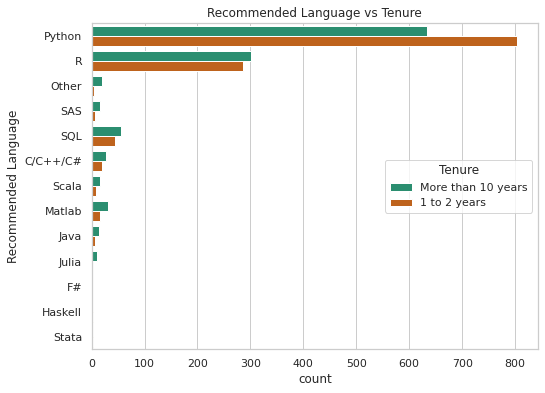

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Recommended Language vs Tenure")
sns.countplot(y = d3['LanguageRecommendationSelect'], hue = d3['Tenure'], palette = "Dark2")
plt.ylabel("Recommended Language")
plt.legend(title="Tenure")
plt.show()

In [ ]:
d3_1 = d3.loc[d3['MLToolNextYearSelect'] == "TensorFlow"]
d3_2 = d3.loc[d3['MLToolNextYearSelect'] == "Python"]
d3_3 = d3.loc[d3['MLToolNextYearSelect'] == "Spark / MLlib"]
d4 = pd.concat([d3_1, d3_2, d3_3], axis = 0)

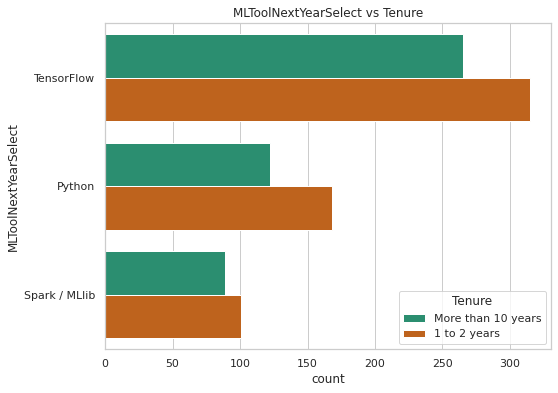

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("MLToolNextYearSelect vs Tenure")
sns.countplot(y = d4['MLToolNextYearSelect'], hue = d4['Tenure'], palette = "Dark2")
plt.ylabel("MLToolNextYearSelect")
plt.legend(title="Tenure")
plt.show()

In [ ]:
d3_1 = d3.loc[d3['MLMethodNextYearSelect'] == "Deep learning"]
d3_2 = d3.loc[d3['MLMethodNextYearSelect'] == "Neural Nets"]
d3_3 = d3.loc[d3['MLMethodNextYearSelect'] == "Time Series Analysis"]
d4 = pd.concat([d3_1, d3_2, d3_3], axis = 0)

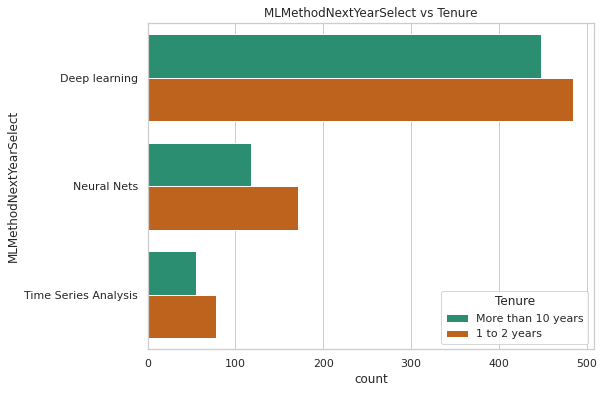

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("MLMethodNextYearSelect vs Tenure")
sns.countplot(y = d4['MLMethodNextYearSelect'], hue = d4['Tenure'], palette = "Dark2")
plt.ylabel("MLMethodNextYearSelect")
plt.legend(title="Tenure")
plt.show()

In [ ]:
train_df["EmployerIndustry"].value_counts()

Technology                          1082
Academic                             884
Financial                            580
Mix of fields                        532
Other                                521
Internet-based                       400
Government                           303
CRM/Marketing                        205
Manufacturing                        192
Telecommunications                   189
Insurance                            181
Retail                               152
Non-profit                            86
Pharmaceutical                        84
Military/Security                     63
Hospitality/Entertainment/Sports      63
Name: EmployerIndustry, dtype: int64

In [ ]:
d1 = train_df.loc[train_df['EmployerIndustry'] == "Technology"]
d2 = train_df.loc[train_df['EmployerIndustry'] == "Academic"]
d3 = pd.concat([d1, d2], axis = 0)


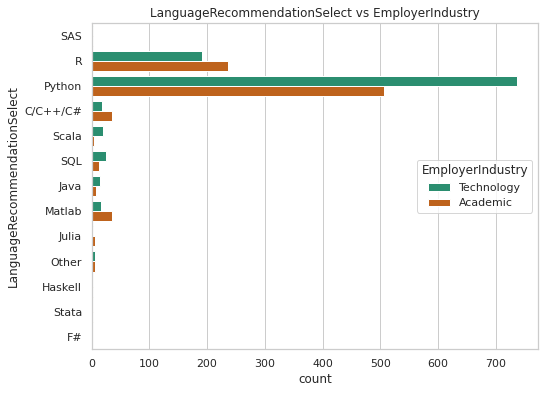

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("LanguageRecommendationSelect vs EmployerIndustry")
sns.countplot(y = d3['LanguageRecommendationSelect'], hue = d3['EmployerIndustry'], palette = "Dark2")
plt.ylabel("LanguageRecommendationSelect")
plt.legend(title="EmployerIndustry")
plt.show()

In [ ]:
d3_1 = d3.loc[d3['MLMethodNextYearSelect'] == "Deep learning"]
d3_2 = d3.loc[d3['MLMethodNextYearSelect'] == "Neural Nets"]
d3_3 = d3.loc[d3['MLMethodNextYearSelect'] == "Time Series Analysis"]
d4 = pd.concat([d3_1, d3_2, d3_3], axis = 0)

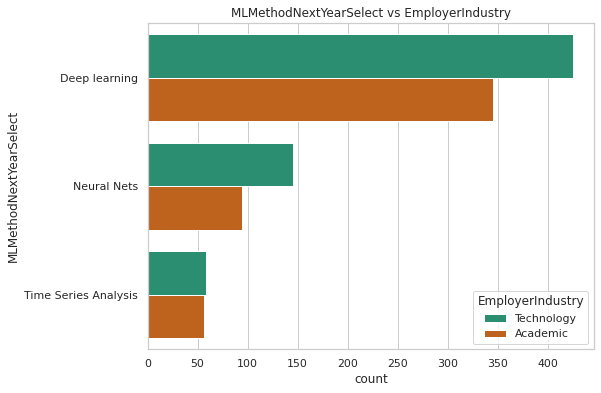

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("MLMethodNextYearSelect vs EmployerIndustry")
sns.countplot(y = d4['MLMethodNextYearSelect'], hue = d4['EmployerIndustry'], palette = "Dark2")
plt.ylabel("MLMethodNextYearSelect")
plt.legend(title="EmployerIndustry")
plt.show()

In [ ]:
d3_1 = d3.loc[d3['MLToolNextYearSelect'] == "TensorFlow"]
d3_2 = d3.loc[d3['MLToolNextYearSelect'] == "Python"]
d3_3 = d3.loc[d3['MLToolNextYearSelect'] == "Spark / MLlib"]
d4 = pd.concat([d3_1, d3_2, d3_3], axis = 0)

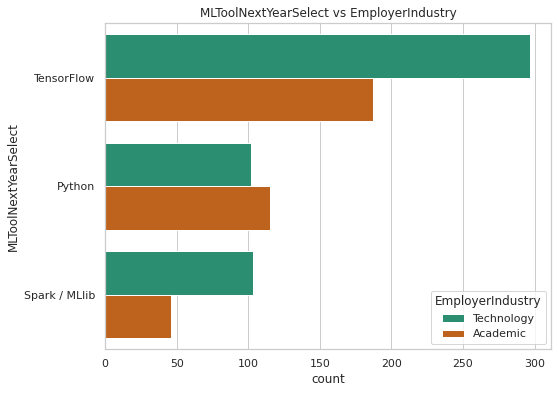

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("MLToolNextYearSelect vs EmployerIndustry")
sns.countplot(y = d4['MLToolNextYearSelect'], hue = d4['EmployerIndustry'], palette = "Dark2")
plt.ylabel("MLToolNextYearSelect")
plt.legend(title="EmployerIndustry")
plt.show()

In [ ]:
train_df["FormalEducation"].value_counts()

Master's degree                                                      2523
Bachelor's degree                                                    1368
Doctoral degree                                                      1231
Professional degree                                                   175
Some college/university study without earning a bachelor's degree     170
I did not complete any formal education past high school               37
I prefer not to answer                                                 18
Name: FormalEducation, dtype: int64

In [ ]:
d1 = train_df.loc[train_df['FormalEducation'] == "Master's degree"]
d2 = train_df.loc[train_df['FormalEducation'] == "Bachelor's degree"]
d4 = train_df.loc[train_df['FormalEducation'] == "Doctoral degree"]
d3 = pd.concat([d1, d2, d4], axis = 0)


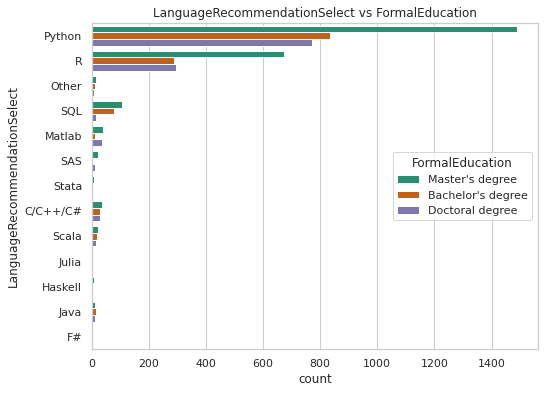

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("LanguageRecommendationSelect vs FormalEducation")
sns.countplot(y = d3['LanguageRecommendationSelect'], hue = d3['FormalEducation'], palette = "Dark2")
plt.ylabel("LanguageRecommendationSelect")
plt.legend(title="FormalEducation")
plt.show()

In [ ]:
train_df["EmployerSize"].value_counts()

10,000 or more employees    1092
100 to 499 employees         841
20 to 99 employees           798
1,000 to 4,999 employees     736
500 to 999 employees         406
10 to 19 employees           314
5,000 to 9,999 employees     293
Fewer than 10 employees      291
I don't know                 140
I prefer not to answer        37
Name: EmployerSize, dtype: int64

In [ ]:
d1 = train_df.loc[train_df['EmployerSize'] == "10,000 or more employees"]
d2 = train_df.loc[train_df['EmployerSize'] == "100 to 499 employees"]
d3 = pd.concat([d1, d2], axis = 0)


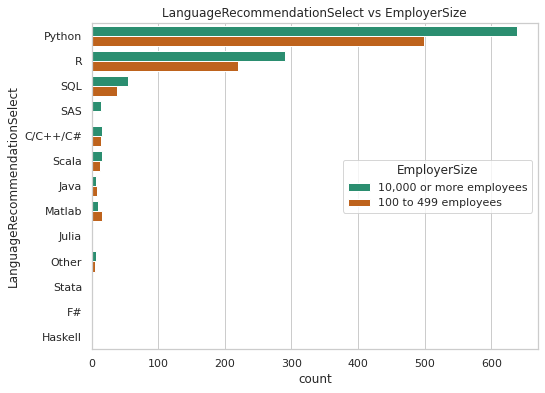

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("LanguageRecommendationSelect vs EmployerSize")
sns.countplot(y = d3['LanguageRecommendationSelect'], hue = d3['EmployerSize'], palette = "Dark2")
plt.ylabel("LanguageRecommendationSelect")
plt.legend(title="EmployerSize")
plt.show()

In [ ]:
d1 = train_df.loc[train_df['Tenure'] == "More than 10 years"]
d2 = train_df.loc[train_df['Tenure'] == "1 to 2 years"]
d3 = pd.concat([d1, d2], axis = 0)


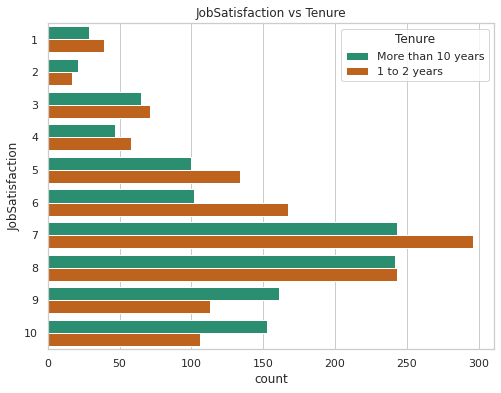

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("JobSatisfaction vs Tenure")
sns.countplot(y = d3['JobSatisfaction'], hue = d3['Tenure'], palette = "Dark2")
plt.ylabel("JobSatisfaction")
plt.legend(title="Tenure")
plt.show()

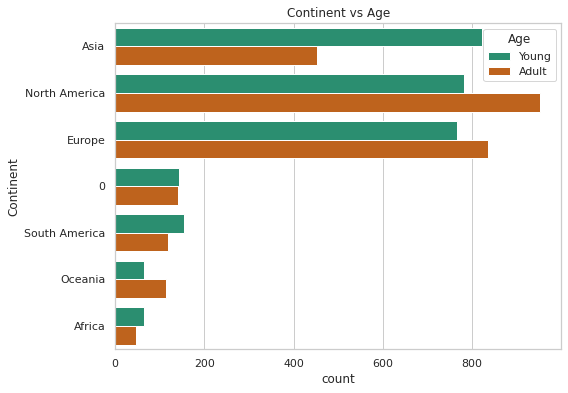

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Continent vs Age")
sns.countplot(y = train_df["Country"], hue = train_df['Age'], palette = "Dark2")
plt.ylabel("Continent")
plt.legend(title="Age")
plt.show()

In [ ]:
train_df["Age"].value_counts()

Young    2797
Adult    2663
Name: Age, dtype: int64

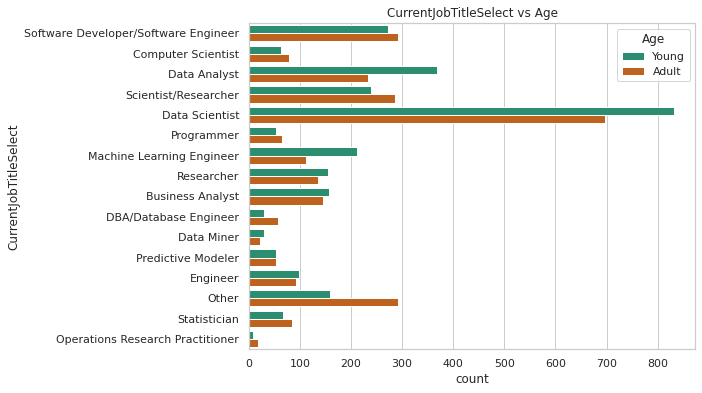

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("CurrentJobTitleSelect vs Age")
sns.countplot(y = train_df["CurrentJobTitleSelect"], hue = train_df['Age'], palette = "Dark2")
plt.ylabel("CurrentJobTitleSelect")
plt.legend(title="Age")
plt.show()

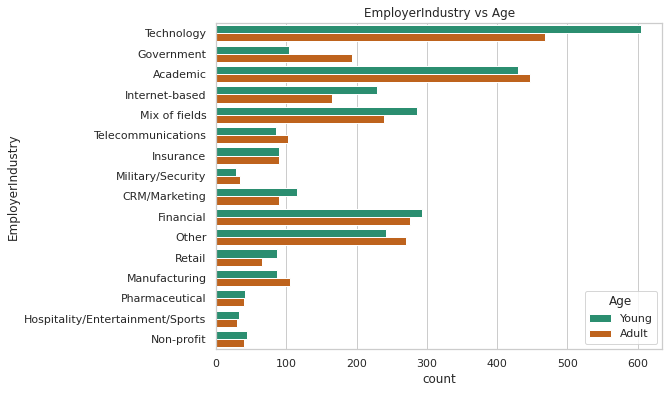

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("EmployerIndustry vs Age")
sns.countplot(y = train_df["EmployerIndustry"], hue = train_df['Age'], palette = "Dark2")
plt.ylabel("EmployerIndustry")
plt.legend(title="Age")
plt.show()

In [ ]:
x = ['10,000 or more employees', '5,000 to 9,999 employees', '1,000 to 4,999 employees' , '500 to 999 employees', '100 to 499 employees' ,'20 to 99 employees' , '10 to 19 employees', 'Fewer than 10 employees', "I don't know"]
x

['10,000 or more employees',
 '5,000 to 9,999 employees',
 '1,000 to 4,999 employees',
 '500 to 999 employees',
 '100 to 499 employees',
 '20 to 99 employees',
 '10 to 19 employees',
 'Fewer than 10 employees',
 "I don't know"]

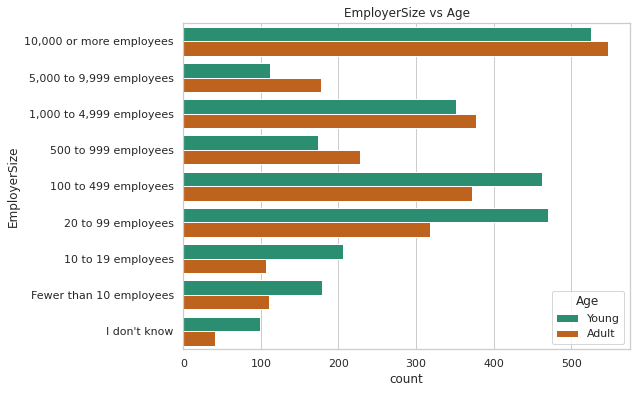

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("EmployerSize vs Age")
sns.countplot(y = train_df["EmployerSize"],order=x, hue = train_df['Age'], palette = "Dark2")
plt.ylabel("EmployerSize")
plt.legend(title="Age")
plt.show()

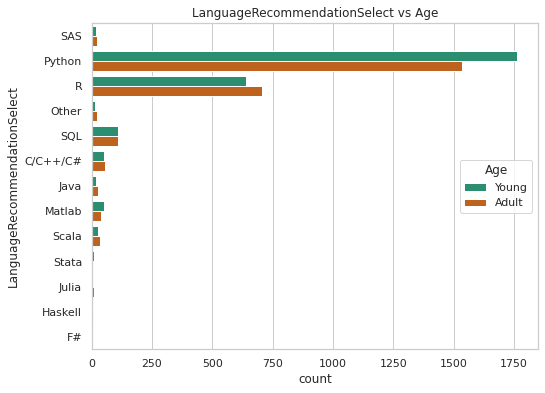

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("LanguageRecommendationSelect vs Age")
sns.countplot(y = train_df["LanguageRecommendationSelect"], hue = train_df['Age'], palette = "Dark2")
plt.ylabel("LanguageRecommendationSelect")
plt.legend(title="Age")
plt.show()

In [ ]:
d1 = train_df.loc[train_df['CurrentJobTitleSelect'] == "Data Scientist"]

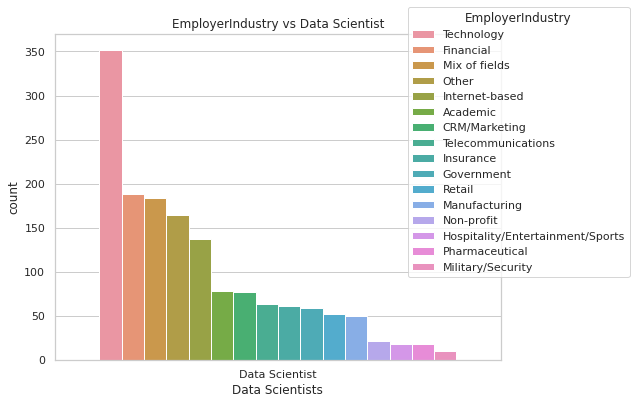

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("EmployerIndustry vs Data Scientist")
sns.countplot(hue = d1["EmployerIndustry"], hue_order = d1["EmployerIndustry"].value_counts().index, x = d1['CurrentJobTitleSelect'])
plt.xlabel("Data Scientists")
plt.legend(title="EmployerIndustry", loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

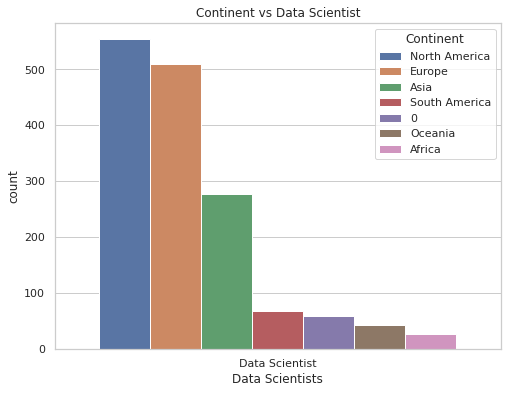

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Continent vs Data Scientist")
sns.countplot(hue = d1["Country"], hue_order = d1["Country"].value_counts().index ,  x = d1['CurrentJobTitleSelect'])
plt.xlabel("Data Scientists")
plt.legend(title="Continent", loc='upper right')
plt.show()

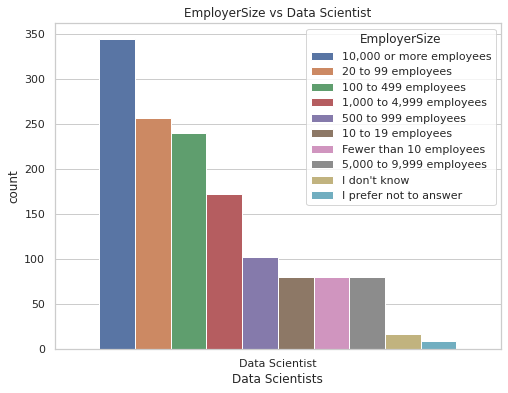

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("EmployerSize vs Data Scientist")
sns.countplot(hue = d1["EmployerSize"], hue_order = d1["EmployerSize"].value_counts().index ,  x = d1['CurrentJobTitleSelect'])
plt.xlabel("Data Scientists")
plt.legend(title="EmployerSize", loc='upper right')
plt.show()

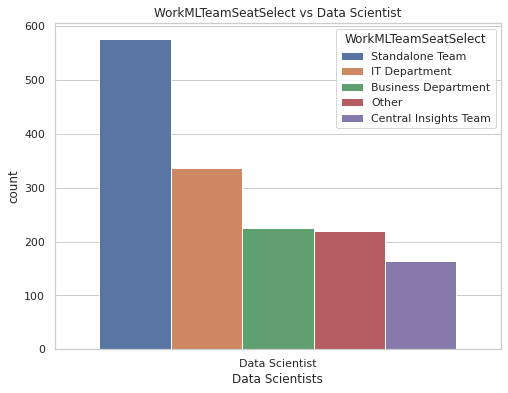

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("WorkMLTeamSeatSelect vs Data Scientist")
sns.countplot(hue = d1["WorkMLTeamSeatSelect"], hue_order = d1["WorkMLTeamSeatSelect"].value_counts().index ,  x = d1['CurrentJobTitleSelect'])
plt.xlabel("Data Scientists")
plt.legend(title="WorkMLTeamSeatSelect", loc='upper right')
plt.show()

In [ ]:
train_df["EmployerSize"].value_counts()

10,000 or more employees    1092
100 to 499 employees         841
20 to 99 employees           798
1,000 to 4,999 employees     736
500 to 999 employees         406
10 to 19 employees           314
5,000 to 9,999 employees     293
Fewer than 10 employees      291
I don't know                 140
I prefer not to answer        37
Name: EmployerSize, dtype: int64

In [ ]:
d1 = train_df.loc[train_df['EmployerSize'] == "10,000 or more employees"]
d2 = train_df.loc[train_df['EmployerSize'] == "100 to 499 employees"]
d3 = pd.concat([d1, d2], axis = 0)

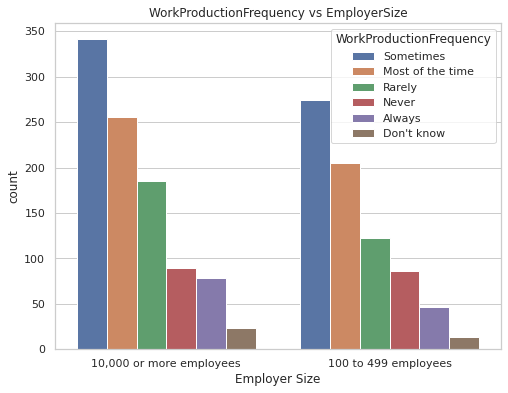

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("WorkProductionFrequency vs EmployerSize")
sns.countplot(hue = d3["WorkProductionFrequency"], x = d3['EmployerSize'])
plt.xlabel("Employer Size")
plt.legend(title="WorkProductionFrequency", loc='upper right')
plt.show()

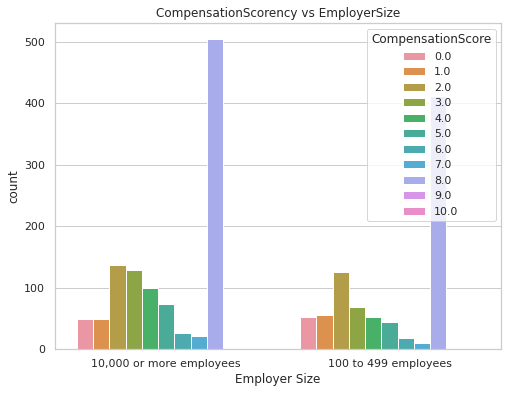

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("CompensationScorency vs EmployerSize")
sns.countplot(hue = d3["CompensationScore"], x = d3['EmployerSize'])
plt.xlabel("Employer Size")
plt.legend(title="CompensationScore", loc='upper right')
plt.show()

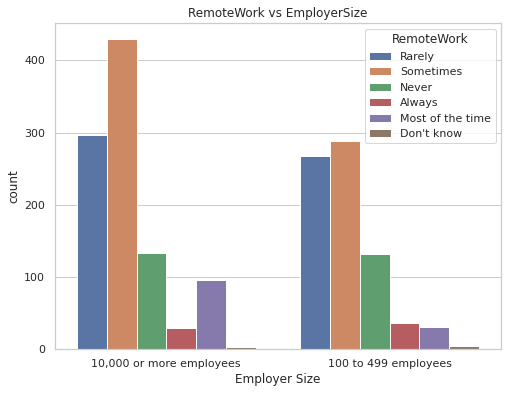

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("RemoteWork vs EmployerSize")
sns.countplot(hue = d3["RemoteWork"], x = d3['EmployerSize'])
plt.xlabel("Employer Size")
plt.legend(title="RemoteWork", loc='upper right')
plt.show()

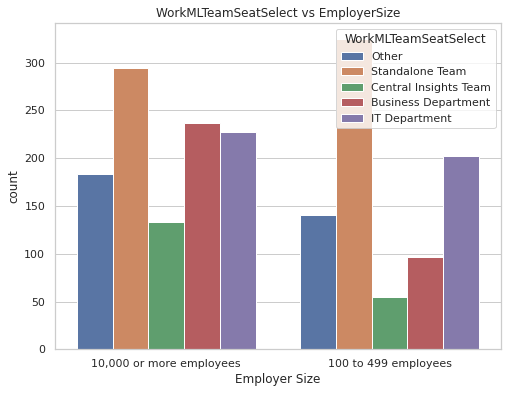

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("WorkMLTeamSeatSelect vs EmployerSize")
sns.countplot(hue = d3["WorkMLTeamSeatSelect"], x = d3['EmployerSize'])
plt.xlabel("Employer Size")
plt.legend(title="WorkMLTeamSeatSelect", loc='upper right')
plt.show()

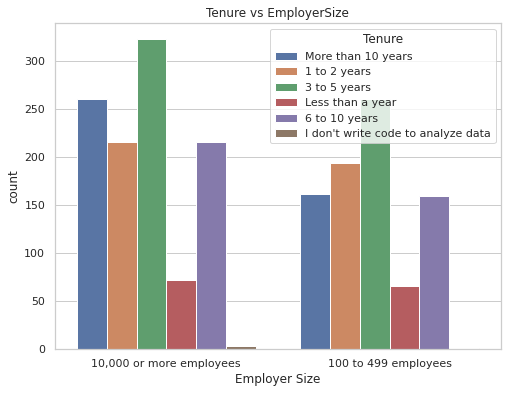

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Tenure vs EmployerSize")
sns.countplot(hue = d3["Tenure"], x = d3['EmployerSize'])
plt.xlabel("Employer Size")
plt.legend(title="Tenure", loc='upper right')
plt.show()

In [ ]:
print(train_df["WorkMethodsFrequencyCross-Validation"].value_counts())
CrossValidation = train_df["WorkMethodsFrequencyCross-Validation"].value_counts()[0] / (train_df["WorkMethodsFrequencyCross-Validation"].count())
CrossValidation

Most of the time    1219
Often                984
Sometimes            526
Rarely                73
Name: WorkMethodsFrequencyCross-Validation, dtype: int64


0.43504639543183443

In [ ]:
print(train_df["WorkMethodsFrequencyDataVisualization"].value_counts())
DataVisualization = train_df["WorkMethodsFrequencyDataVisualization"].value_counts()[0] / (train_df["WorkMethodsFrequencyDataVisualization"].count())
DataVisualization

Most of the time    2210
Often               1062
Sometimes            311
Rarely                37
Name: WorkMethodsFrequencyDataVisualization, dtype: int64


0.6104972375690608

In [ ]:
print(train_df["WorkMethodsFrequencyDecisionTrees"].value_counts())
DecisionTrees = train_df["WorkMethodsFrequencyDecisionTrees"].value_counts()[0] / (train_df["WorkMethodsFrequencyDecisionTrees"].count())
DecisionTrees

Often               1033
Sometimes            894
Most of the time     579
Rarely               148
Name: WorkMethodsFrequencyDecisionTrees, dtype: int64


0.3892238131122833

In [ ]:
print(train_df["WorkMethodsFrequencyLogisticRegression"].value_counts())
LogisticRegression = train_df["WorkMethodsFrequencyLogisticRegression"].value_counts()[0] / (train_df["WorkMethodsFrequencyLogisticRegression"].count())
LogisticRegression

Often               1310
Sometimes            914
Most of the time     753
Rarely               149
Name: WorkMethodsFrequencyLogisticRegression, dtype: int64


0.419065898912348

In [ ]:
print(train_df["WorkMethodsFrequencyNeuralNetworks"].value_counts())
NeuralNetworks = train_df["WorkMethodsFrequencyNeuralNetworks"].value_counts()[0] / (train_df["WorkMethodsFrequencyNeuralNetworks"].count())
NeuralNetworks

Often               685
Sometimes           599
Most of the time    563
Rarely              120
Name: WorkMethodsFrequencyNeuralNetworks, dtype: int64


0.3482460599898322

In [ ]:
print(train_df["WorkMethodsFrequencyPCA"].value_counts())
PCA = train_df["WorkMethodsFrequencyPCA"].value_counts()[0] / (train_df["WorkMethodsFrequencyPCA"].count())
PCA

Often               818
Sometimes           707
Most of the time    413
Rarely              108
Name: WorkMethodsFrequencyPCA, dtype: int64


0.3998044965786901

In [ ]:
print(train_df["WorkMethodsFrequencyRandomForests"].value_counts())
RandomForests = train_df["WorkMethodsFrequencyRandomForests"].value_counts()[0] / (train_df["WorkMethodsFrequencyRandomForests"].count())
RandomForests

Often               996
Sometimes           804
Most of the time    573
Rarely              129
Name: WorkMethodsFrequencyRandomForests, dtype: int64


0.3980815347721823

In [ ]:
print(train_df["WorkMethodsFrequencyTimeSeriesAnalysis"].value_counts())
TimeSeries = train_df["WorkMethodsFrequencyTimeSeriesAnalysis"].value_counts()[0] / (train_df["WorkMethodsFrequencyTimeSeriesAnalysis"].count())
TimeSeries

Often               837
Sometimes           691
Most of the time    657
Rarely              109
Name: WorkMethodsFrequencyTimeSeriesAnalysis, dtype: int64


0.36486486486486486

Text(0, 0.5, 'Methods')

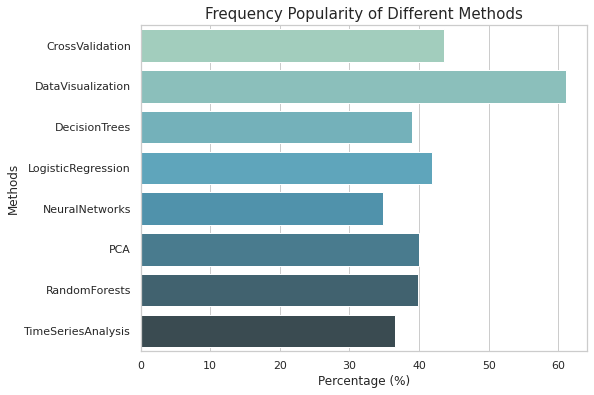

In [ ]:
xax = ["CrossValidation",  "DataVisualization", "DecisionTrees","LogisticRegression", "NeuralNetworks", "PCA", "RandomForests", "TimeSeriesAnalysis"]
yax = [CrossValidation*100,  DataVisualization*100, DecisionTrees*100, LogisticRegression*100, NeuralNetworks*100, PCA*100, RandomForests*100, TimeSeries*100]
plt.figure(figsize=(8,6))
sns.barplot(y=xax, x= yax , palette='GnBu_d')
plt.title('Frequency Popularity of Different Methods', fontsize=15)
plt.xlabel('Percentage (%)')
plt.ylabel("Methods")

In [ ]:
print(train_df["WorkChallengeFrequencyPolitics"].value_counts())
Politics = train_df["WorkChallengeFrequencyPolitics"].value_counts()[0] / (train_df["WorkChallengeFrequencyPolitics"].count())
Politics

Often               838
Sometimes           627
Most of the time    555
Rarely               72
Name: WorkChallengeFrequencyPolitics, dtype: int64


0.4005736137667304

In [ ]:
print(train_df["WorkChallengeFrequencyUnusedResults"].value_counts())
UnusedResult = train_df["WorkChallengeFrequencyUnusedResults"].value_counts()[0] / (train_df["WorkChallengeFrequencyUnusedResults"].count())
UnusedResult

Often               600
Sometimes           507
Most of the time    206
Rarely               47
Name: WorkChallengeFrequencyUnusedResults, dtype: int64


0.4411764705882353

In [ ]:
print(train_df["WorkChallengeFrequencyDirtyData"].value_counts())
DirtyData = train_df["WorkChallengeFrequencyDirtyData"].value_counts()[0] / (train_df["WorkChallengeFrequencyDirtyData"].count())
DirtyData

Most of the time    1182
Often               1119
Sometimes            449
Rarely                19
Name: WorkChallengeFrequencyDirtyData, dtype: int64


0.4268689057421452

In [ ]:
print(train_df["WorkChallengeFrequencyExplaining"].value_counts())
Explaining = train_df["WorkChallengeFrequencyExplaining"].value_counts()[0] / (train_df["WorkChallengeFrequencyExplaining"].count())
Explaining

Often               521
Sometimes           451
Most of the time    237
Rarely               41
Name: WorkChallengeFrequencyExplaining, dtype: int64


0.4168

In [ ]:
print(train_df["WorkChallengeFrequencyTalent"].value_counts())
Talent = train_df["WorkChallengeFrequencyTalent"].value_counts()[0] / (train_df["WorkChallengeFrequencyTalent"].count())
Talent

Often               949
Most of the time    734
Sometimes           631
Rarely               52
Name: WorkChallengeFrequencyTalent, dtype: int64


0.4010989010989011

In [ ]:
print(train_df["WorkChallengeFrequencyClarity"].value_counts())
Clarity = train_df["WorkChallengeFrequencyClarity"].value_counts()[0] / (train_df["WorkChallengeFrequencyClarity"].count())
Clarity

Often               723
Most of the time    503
Sometimes           459
Rarely               39
Name: WorkChallengeFrequencyClarity, dtype: int64


0.4193735498839907

In [ ]:
print(train_df["WorkChallengeFrequencyDataAccess"].value_counts())
DataAccess = train_df["WorkChallengeFrequencyDataAccess"].value_counts()[0] / (train_df["WorkChallengeFrequencyDataAccess"].count())
DataAccess

Often               722
Most of the time    478
Sometimes           473
Rarely               47
Name: WorkChallengeFrequencyDataAccess, dtype: int64


0.4197674418604651

Text(0, 0.5, 'Challanges')

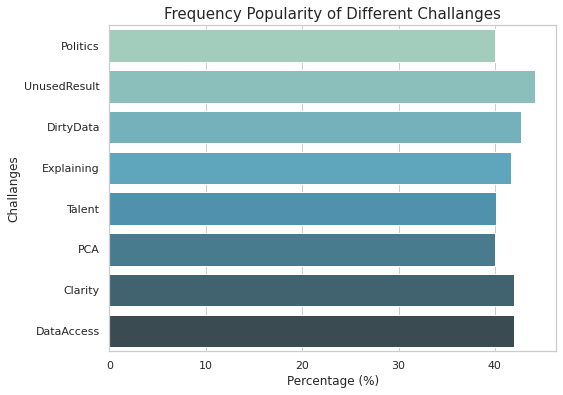

In [ ]:
xax = ["Politics",  "UnusedResult", "DirtyData","Explaining", "Talent","PCA" ,"Clarity", "DataAccess"]
yax = [Politics*100,  UnusedResult*100, DirtyData*100, Explaining*100, Talent*100, PCA*100, Clarity*100, DataAccess*100]
plt.figure(figsize=(8,6))
sns.barplot( y =xax, x = yax , palette='GnBu_d')
plt.title('Frequency Popularity of Different Challanges', fontsize=15)
plt.xlabel('Percentage (%)')
plt.ylabel("Challanges")

Text(0, 0.5, 'Methods')

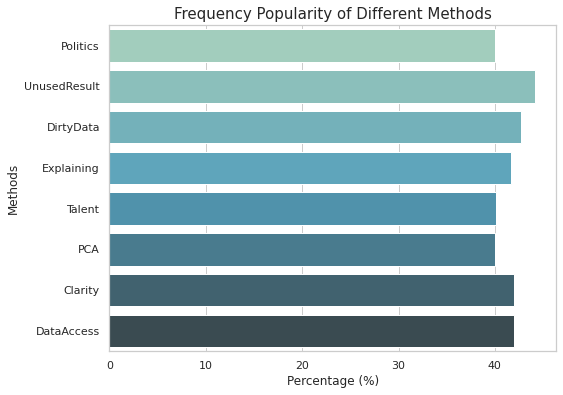

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot( y =xax, x = yax , palette='GnBu_d')
plt.title('Frequency Popularity of Different Methods', fontsize=15)
plt.xlabel('Percentage (%)')
plt.ylabel("Methods")